<a href="https://colab.research.google.com/github/randreove/Deep-vision-in-classification-tasks/blob/main/Proyecto_Programacion_SOLUCION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning:
# Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

# Carga e inspección de los datos

## Carga de datos desde la plataforma Kaggle

En primer lugar se debe generar un API de Kaggle personal, para ello:
1. Registrarse en  https://www.kaggle.com
2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
3. Almacenar en tu ordenador local el fichero kaggle.json

Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab

In [ ]:
%%capture

!pip install --upgrade --force-reinstall --no-deps kaggle

Creemos un directorio para descomprimir los datos

In [ ]:
!mkdir my_dataset

Seleccionar el API Token personal previamente descargado (fichero kaggle.json)

In [ ]:
# %%capture

from google.colab import files
capt = files.upload()
print("Token de usuario cargado.")

Saving kaggle.json to kaggle.json
Token de usuario cargado.


Creamos un directorio en el que copiamos el fichero kaggle.json

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
Antes de descargar el dataset debemos ir a https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset y aceptar las "Competition Rules"
En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje **"403 - Forbidden"**
AHORA SI: Descarguemos un dataset de la competición

In [ ]:
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

 98% 525M/534M [00:04<00:00, 84.6MB/s]
100% 534M/534M [00:04<00:00, 118MB/s] 


Según la descripción del dataset:

*En este conjunto de datos hay 21000 imágenes de 15 clases, donde cada clase contiene un total de 1400 imágenes. Cada clase tiene la misma proporción y la resolución de la imagen es 224×224 y en formato *.jpg. Dividimos nuestro conjunto de datos en tres partes, donde el 70% (aprox.) para entrenamiento y el 15% (aprox.) para pruebas, y el resto el 15% (aprox.) para validación.*

Descomprimimos los datos y los dejamos listos para trabajar

In [ ]:
%%capture --no-display

!unzip vegetable-image-dataset.zip -d my_dataset

Los directorios corresponden a cada una de las clases:

In [ ]:
!ls 'my_dataset/Vegetable Images/train/'

Bean	      Bottle_Gourd  Broccoli  Capsicum	Cauliflower  Papaya  Pumpkin  Tomato
Bitter_Gourd  Brinjal	    Cabbage   Carrot	Cucumber     Potato  Radish


In [ ]:
!ls 'my_dataset/Vegetable Images/validation/'

Bean	      Bottle_Gourd  Broccoli  Capsicum	Cauliflower  Papaya  Pumpkin  Tomato
Bitter_Gourd  Brinjal	    Cabbage   Carrot	Cucumber     Potato  Radish


In [ ]:
!ls 'my_dataset/Vegetable Images/test/'

Bean	      Bottle_Gourd  Broccoli  Capsicum	Cauliflower  Papaya  Pumpkin  Tomato
Bitter_Gourd  Brinjal	    Cabbage   Carrot	Cucumber     Potato  Radish


Recorremos los directorios para comprobar su contenido:

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("my_dataset/Vegetable Images/"):
  print(f"Hay {len(dirnames):3d} directorios y {len(filenames):5d} imágenes en '{dirpath}'.")

Hay   3 directorios y     0 imágenes en 'my_dataset/Vegetable Images/'.
Hay  15 directorios y     0 imágenes en 'my_dataset/Vegetable Images/train'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Cucumber'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Pumpkin'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Potato'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Radish'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Bottle_Gourd'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Broccoli'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Papaya'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Cabbage'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Bitter_Gourd'.
Hay   0 directorios y  1000 imágenes en 'my_dataset/Vegetable Images/train/Be

Con esto comprobamos que el tamaño del dataset y el reparto de imágenes en entrenamiento, validación y test corresponde con la descripción.

## Inspección del conjunto de imagenes del dataset

Conectamos con nuestro Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Establezco una ruta absoluta a un directorio existente de mi Google Drive y en el entorno de ejecución de Google Colab

In [ ]:
BASE_DIR = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"
DATA_DIR = "my_dataset/Vegetable Images/"

Para que los resultados sean reproducibles, establecemos una semilla.

Estableciendo la semilla usando keras.utils.set_random_seed. Se establecen las siguientes semillas:
1. `numpy` seed
2. `tensorflow` random seed
3. `python` random seed

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

Creamos una función para mostrar imágenes aleatorias del dataset, dado el directorio dónde se encuentren y la cantidad a mostrar (filas x columnas)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random

def show_random_images(dir_path, n_rows=2, n_cols=5):
  fig = plt.subplots(n_rows, n_cols, figsize=(15, 6))

  dir = [x[0] for x in os.walk(dir_path)]

  for i in range(n_rows * n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])

    # Escogiendo y mostrando una imagenes al azar del conjunto de entrenamiento
    dir_id = np.random.randint(1, len(dir))
    # print(os.path.join(dir[dir_id], random.choice(os.listdir(dir[dir_id]))), "\n")

    img = cv2.imread(os.path.join(dir[dir_id], random.choice(os.listdir(dir[dir_id]))), cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    label = dir[dir_id].rsplit('/', 1)[-1]
    ax.title.set_text(label)

    ax.imshow(img)

  plot_title = str(dir_path.split('/')[-3] + ' - ' + dir_path.split('/')[-2]).upper()
  plt.suptitle(plot_title + '\n', fontsize=20)
  plt.show()

Creamos una función para comprobar las dimensiones de las imágenes del dataset, dado el directorio dónde se encuentran

In [ ]:
import os

def check_dataset_dims(dir_path):

  dir = [x[0] for x in os.walk(dir_path)][1:]

  min_w, max_w = float('inf'), 0
  min_h, max_h = float('inf'), 0

  dir_id = np.random.randint(1, len(dir))

  img = cv2.imread(os.path.join(dir[dir_id], random.choice(os.listdir(dir[dir_id]))), cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  for sub_dir in dir:
    for file_id in os.listdir(sub_dir):
      if file_id is not None:
        img = cv2.imread(os.path.join(sub_dir, file_id))
        min_w, max_w = min(min_w, img.shape[0]), max(max_w, img.shape[0])
        min_h, max_h = min(min_h, img.shape[1]), max(max_h, img.shape[1])

  ds_title = str(dir_path.split('/')[-3] + ' - ' + dir_path.split('/')[-2]).upper()
  print(f'[INFO]: Análisis de las imágenes del dataset: {ds_title}.')

  if min_w == max_w:
    print(f'[INFO]: El ancho de las imagenes es igual a {max_w} pixeles')
  else:
    print(f'[INFO]: El ancho de las imagenes varía entre {min_w} y {max_w} pixeles')

  if min_h == max_h:
    print(f'[INFO]: La altura de las imagenes es igual a {max_h} pixeles')
  else:
    print(f'[INFO]: La altura de las imagenes varía entre {min_h} y {max_h} pixeles')

Mostramos 10 imágenes aleatorias del conjunto de entrenamiento

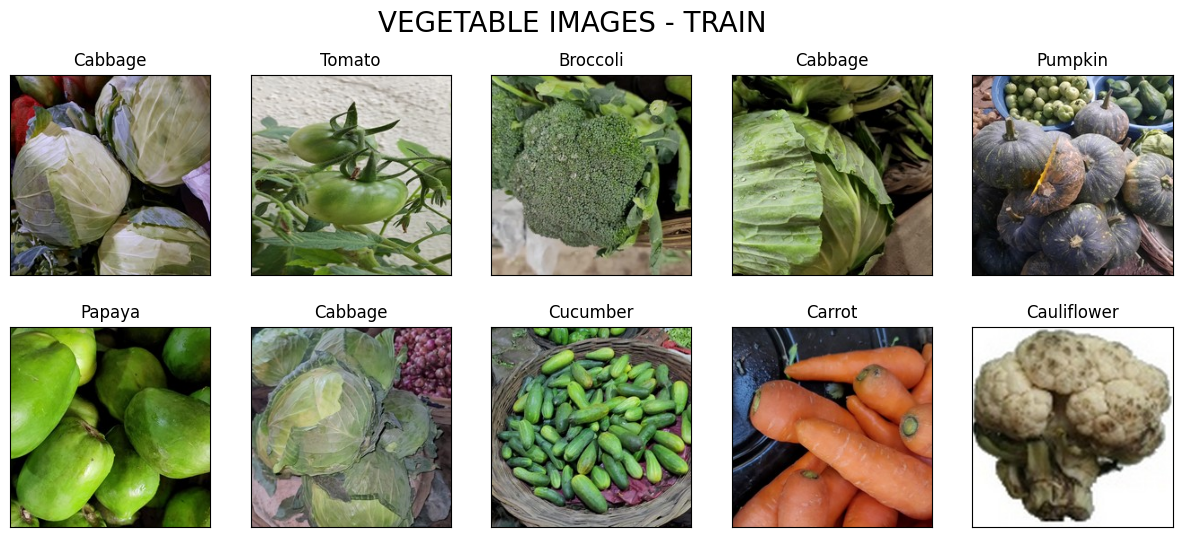

In [ ]:
show_random_images(DATA_DIR + 'train/', 2, 5)

Exploramos el cojunto de entrenamiento y comprobamos sus dimensiones:

In [ ]:
check_dataset_dims(DATA_DIR + 'train/')

[INFO]: Análisis de las imágenes del dataset: VEGETABLE IMAGES - TRAIN.
[INFO]: El ancho de las imagenes varía entre 193 y 224 pixeles
[INFO]: La altura de las imagenes es igual a 224 pixeles


Mostramos 10 imágenes aleatorias del conjunto de validacion del dataset

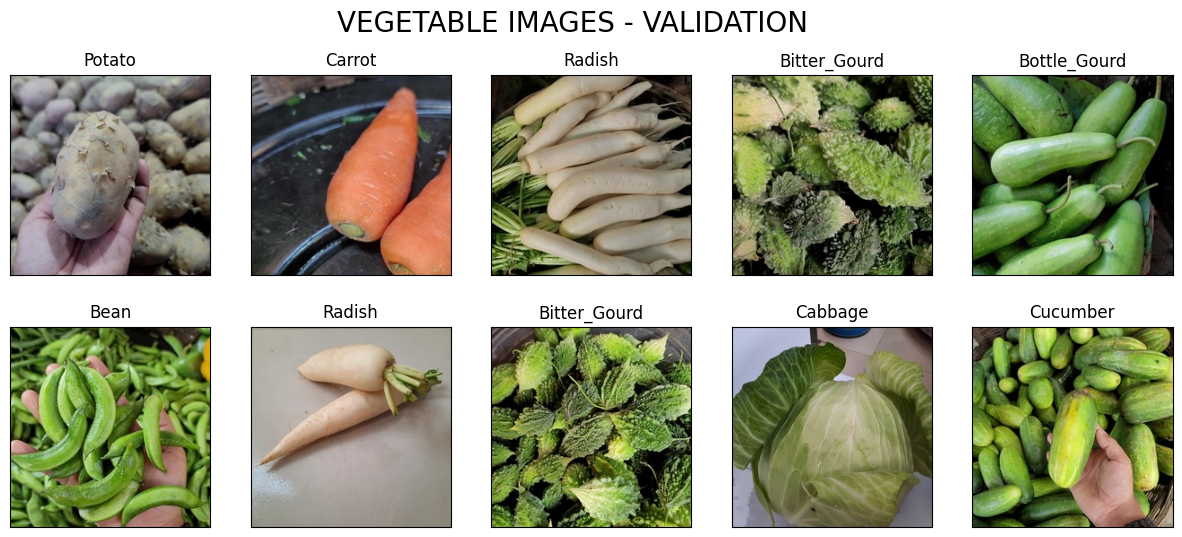

In [ ]:
show_random_images(DATA_DIR + 'validation/', 2, 5)

Exploramos el cojunto de validación y comprobamos sus dimensiones:

In [ ]:
check_dataset_dims(DATA_DIR + 'validation/')

[INFO]: Análisis de las imágenes del dataset: VEGETABLE IMAGES - VALIDATION.
[INFO]: El ancho de las imagenes varía entre 187 y 224 pixeles
[INFO]: La altura de las imagenes es igual a 224 pixeles


Mostramos 10 imágenes aleatorias del conjunto de test del dataset

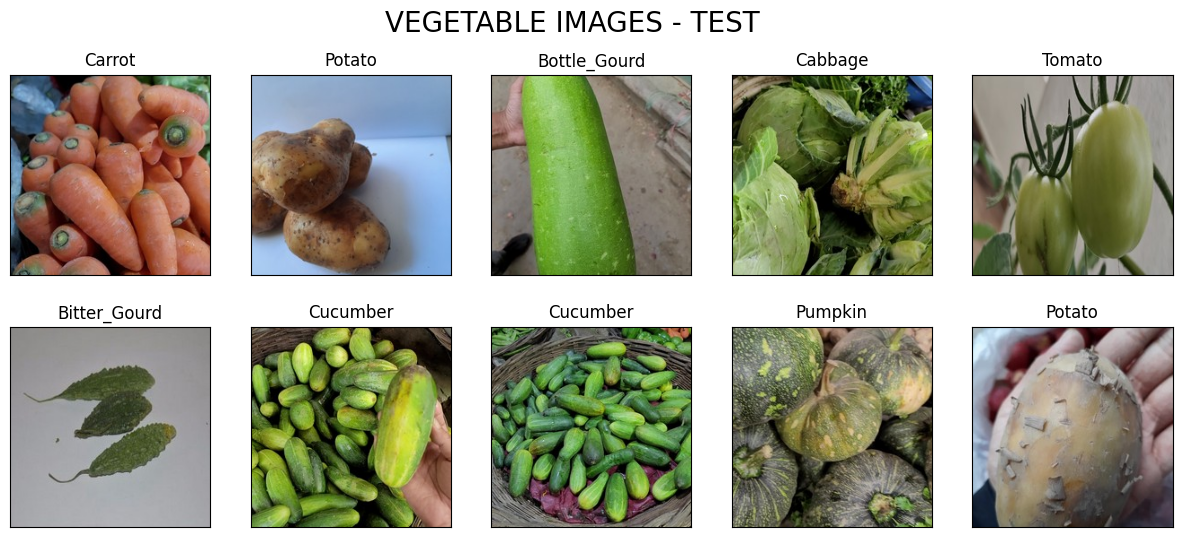

In [ ]:
show_random_images(DATA_DIR + 'test/', 2, 5)

Exploramos el cojunto de test y comprobamos sus dimensiones:

In [ ]:
check_dataset_dims(DATA_DIR + 'test/')

[INFO]: Análisis de las imágenes del dataset: VEGETABLE IMAGES - TEST.
[INFO]: El ancho de las imagenes varía entre 207 y 224 pixeles
[INFO]: La altura de las imagenes es igual a 224 pixeles


Con esto comprobamos que el tamaño de las imágenes del dataset en entrenamiento, validación y test no corresponde exactamente con la descripción.
El ancho de las imágenes varía entre 187 (en el dataset de validación) y 224 píxeles, mientras que la altura para todas ellas es igual a 224 píxeles.

# Estrategia 1: Entrenar desde cero o *from scratch*


Establecemos un tamaño de batch para todo el proyecto de programación:

In [ ]:
BATCH_SIZE = 128

## Callbacks

Definimos diferentes callbacks para monitorizar y guardar los distintos modelos que vayamos desarrollando.

Si no existen los directorios, los creamos.

In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

if not os.path.exists(BASE_DIR + 'models/'):
  os.mkdir(BASE_DIR + 'models/')

early_stop = EarlyStopping(monitor='val_loss', mode='min',
                           patience=5, verbose=1,
                           restore_best_weights=True)

check_point= ModelCheckpoint(BASE_DIR + 'models/',
                             monitor='val_loss', mode='min',
                             verbose=1,
                             save_best_only=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1,
                              patience=3, verbose=1,
                              min_lr=1e-6)

## Funciones para evaluar los modelos

Definimos diferentes funciones para evaluar los modelos que vayamos desarrollando

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_learning_curve(H):
  epochs = len(H.history["loss"])
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

In [ ]:
import math
import numpy as np
from sklearn.metrics import classification_report

def evaluate_model(model, dataset, batch_size=BATCH_SIZE):
  dataset.reset()
  _, y_true = next(dataset)
  for i in range(int(math.ceil(dataset.n / batch_size)) - 1):
    _, label = next(dataset)
    y_true = np.append(y_true, label, axis=0)
  y_true = np.argmax(y_true, axis=1)

  print("[INFO]: Evaluando red neuronal...")
  y_pred = model.predict(dataset, verbose=0)
  y_pred = y_pred.argmax(axis=1)

  print("[INFO]: Obteniendo informe de métricas...")
  print(classification_report(y_true,y_pred, target_names=list(dataset.class_indices.keys())))

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, dataset, batch_size=BATCH_SIZE):
  dataset.reset()
  _, y_true = next(dataset)
  for i in range(int(math.ceil(dataset.n / batch_size)) - 1):
    _, label = next(dataset)
    y_true = np.append(y_true, label, axis=0)
  y_true = np.argmax(y_true, axis=1)

  print("[INFO]: Evaluando red neuronal...")
  y_pred = model.predict(dataset, verbose=0)
  y_pred = y_pred.argmax(axis=1)

  print("[INFO]: Obteniendo matriz de confusión...")
  plt.figure(figsize=(10, 10))
  sns.set()
  sns.heatmap(confusion_matrix(y_true, y_pred),
              annot=True, fmt="d", linewidths=.5, cmap="coolwarm",
              xticklabels=list(dataset.class_indices.keys()), yticklabels=list(dataset.class_indices.keys()))
  plt.title("Matriz de Confusion")
  plt.show()

## Cargamos el conjunto de imagenes de entrenamiento, validación y test

Una vez comprobado que se han descargado correctamente los datos, vamos a cargargarlos desde sus directorios. Haremos uso de **ImageDataGenerator** para cargar y normalizar las imágenes.

El tamaño de entrada lo mantendremos en *(224, 224, 3)* para que sea coincidente con los tamaños de entrada de los modelos del apartado siguiente "Estrategia 2: Red pre-entrenada".

En este primer momento **NO** haremos uso de **DataAugmentation**.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1 / 255.)

train_data = datagen.flow_from_directory(DATA_DIR + 'train/',
                                         target_size=(224, 224),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

valid_data = datagen.flow_from_directory(DATA_DIR + 'validation/',
                                         target_size=(224, 224),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=False)

test_data = datagen.flow_from_directory(DATA_DIR + 'test/',
                                        target_size=(224, 224),
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


## Modelos:

Partiremos un modelo sencillo, evaluaremos su desempeño e incrementaremos su complejidad hasta obtener resultados aceptables.

Pondremos un número de épocas suficientemente elevado para que las *callbacks* detengan el entrenamiento cuando no haya mejora con *Early stopping*. También comenzaremos con un *learning rate* alto, para que se vaya ajustando durante el entrenamiento mediante *Reduce learning rate on plateau*.

### **Modelo 1**

Partimos de una solución con una capa convolucional.

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, GlobalMaxPooling2D, Dense
from keras.optimizers import Adam


model_1 = Sequential()

# BASE MODEL
model_1.add(Input((224, 224, 3)))

# Bloque 1
model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_1.add(GlobalMaxPooling2D())

# TOP MODEL
model_1.add(Dense(15, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 global_max_pooling2d (Glob  (None, 64)                0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 15)                975       
                                                                 
Total params: 2767 (10.81 KB)
Trainable params: 2767 (10.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.1),
                metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=100,
                        batch_size=BATCH_SIZE,
                        validation_data=valid_data,
                        callbacks=[early_stop, check_point, reduce_lr])

Epoch 1/100
118/118 [==============================] - ETA: 0s - loss: 2.7789 - accuracy: 0.0691
Epoch 1: val_loss improved from inf to 2.72123, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==============================] - 67s 486ms/step - loss: 2.7789 - accuracy: 0.0691 - val_loss: 2.7212 - val_accuracy: 0.0667 - lr: 0.1000
Epoch 2/100
118/118 [==============================] - ETA: 0s - loss: 2.7166 - accuracy: 0.0633
Epoch 2: val_loss improved from 2.72123 to 2.71796, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==============================] - 48s 403ms/step - loss: 2.7166 - accuracy: 0.0633 - val_loss: 2.7180 - val_accuracy: 0.0667 - lr: 0.1000
Epoch 3/100
118/118 [==============================] - ETA: 0s - loss: 2.7164 - accuracy: 0.0674
Epoch 3: val_loss improved from 2.71796 to 2.71496, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==========================

In [ ]:
model_1.save(BASE_DIR + 'models/' + 'model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tras el entrenamiento evaluamos el modelo con los datos de test:

In [ ]:
model_1.evaluate(test_data)

24/24 [==============================] - 6s 241ms/step - loss: 2.7081 - accuracy: 0.0667


[2.7080609798431396, 0.06666667014360428]

In [ ]:
evaluate_model(model_1, test_data)

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.07      1.00      0.12       200
Bitter_Gourd       0.00      0.00      0.00       200
Bottle_Gourd       0.00      0.00      0.00       200
     Brinjal       0.00      0.00      0.00       200
    Broccoli       0.00      0.00      0.00       200
     Cabbage       0.00      0.00      0.00       200
    Capsicum       0.00      0.00      0.00       200
      Carrot       0.00      0.00      0.00       200
 Cauliflower       0.00      0.00      0.00       200
    Cucumber       0.00      0.00      0.00       200
      Papaya       0.00      0.00      0.00       200
      Potato       0.00      0.00      0.00       200
     Pumpkin       0.00      0.00      0.00       200
      Radish       0.00      0.00      0.00       200
      Tomato       0.00      0.00      0.00       200

    accuracy                           0.07      3000
   m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


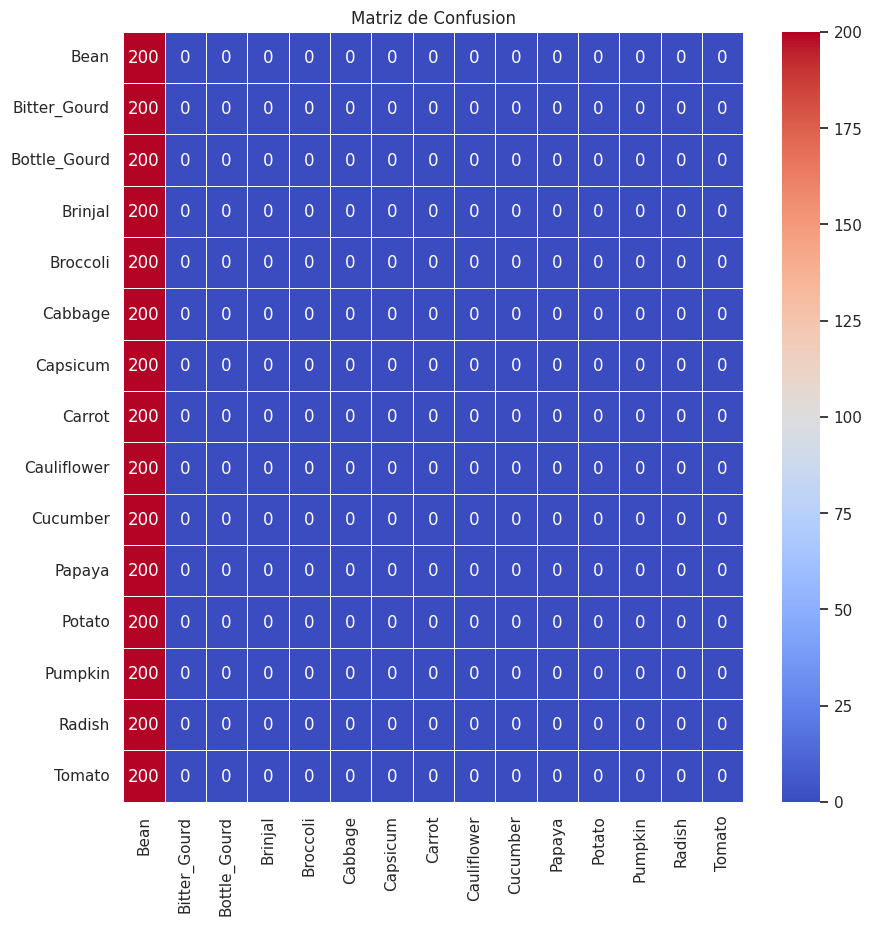

In [ ]:
plot_confusion_matrix(model_1, test_data)

Y obtenemos las curvas de aprendizaje:

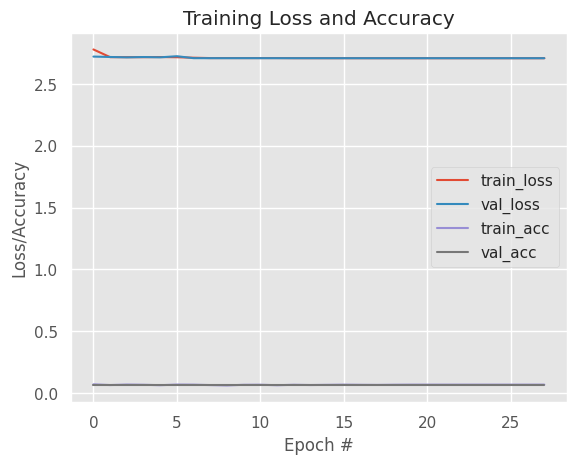

In [ ]:
visualize_learning_curve(history_1)

Comentarios

Tal como era de prever, un modelo tan sencillo predice muy mal. Es más, viendo la matriz de confusión vemos que sólo predice una única clase para todos los casos.

### **Modelo 2**

Añadiremos más complejidad al modelo, con dos bloques y una capa convolucional por bloque.

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Dense
from keras.optimizers import Adam


model_2 = Sequential()

# BASE MODEL
model_2.add(Input((224, 224, 3)))

# Bloque 1
model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(padding='same'))

# Bloque 2
model_2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_2.add(GlobalMaxPooling2D())

# TOP MODEL
model_2.add(Dense(15, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 global_max_pooling2d_1 (Gl  (None, 64)                0         
 obalMaxPooling2D)                                               
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 39695 (155.06 KB)
Trainable params: 3969

In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.1),
                metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_data,
                        epochs=100,
                        batch_size=BATCH_SIZE,
                        validation_data=valid_data,
                        callbacks=[early_stop, check_point, reduce_lr])

Epoch 1/100
118/118 [==============================] - ETA: 0s - loss: 3.9838 - accuracy: 0.1020
Epoch 1: val_loss improved from 2.70806 to 2.61531, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==============================] - 52s 414ms/step - loss: 3.9838 - accuracy: 0.1020 - val_loss: 2.6153 - val_accuracy: 0.1323 - lr: 0.1000
Epoch 2/100
118/118 [==============================] - ETA: 0s - loss: 2.5251 - accuracy: 0.1492
Epoch 2: val_loss improved from 2.61531 to 2.42695, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==============================] - 45s 383ms/step - loss: 2.5251 - accuracy: 0.1492 - val_loss: 2.4269 - val_accuracy: 0.1867 - lr: 0.1000
Epoch 3/100
118/118 [==============================] - ETA: 0s - loss: 2.3859 - accuracy: 0.1943
Epoch 3: val_loss improved from 2.42695 to 2.30556, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [======================

In [ ]:
model_2.save(BASE_DIR + 'models/' + 'model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tras el entrenamiento evaluamos el modelo con los datos de test:

In [ ]:
model_2.evaluate(test_data)

24/24 [==============================] - 6s 251ms/step - loss: 1.8790 - accuracy: 0.3633


[1.8790149688720703, 0.3633333444595337]

In [ ]:
evaluate_model(model_2, test_data)

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.21      0.09      0.12       200
Bitter_Gourd       0.47      0.62      0.53       200
Bottle_Gourd       0.24      0.20      0.22       200
     Brinjal       0.26      0.21      0.24       200
    Broccoli       0.49      0.69      0.57       200
     Cabbage       0.17      0.08      0.11       200
    Capsicum       0.32      0.42      0.36       200
      Carrot       0.20      0.24      0.22       200
 Cauliflower       0.21      0.14      0.16       200
    Cucumber       0.28      0.21      0.24       200
      Papaya       0.50      0.73      0.59       200
      Potato       0.62      0.96      0.75       200
     Pumpkin       0.25      0.28      0.27       200
      Radish       0.43      0.40      0.42       200
      Tomato       0.23      0.17      0.20       200

    accuracy                           0.36      3000
   m

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


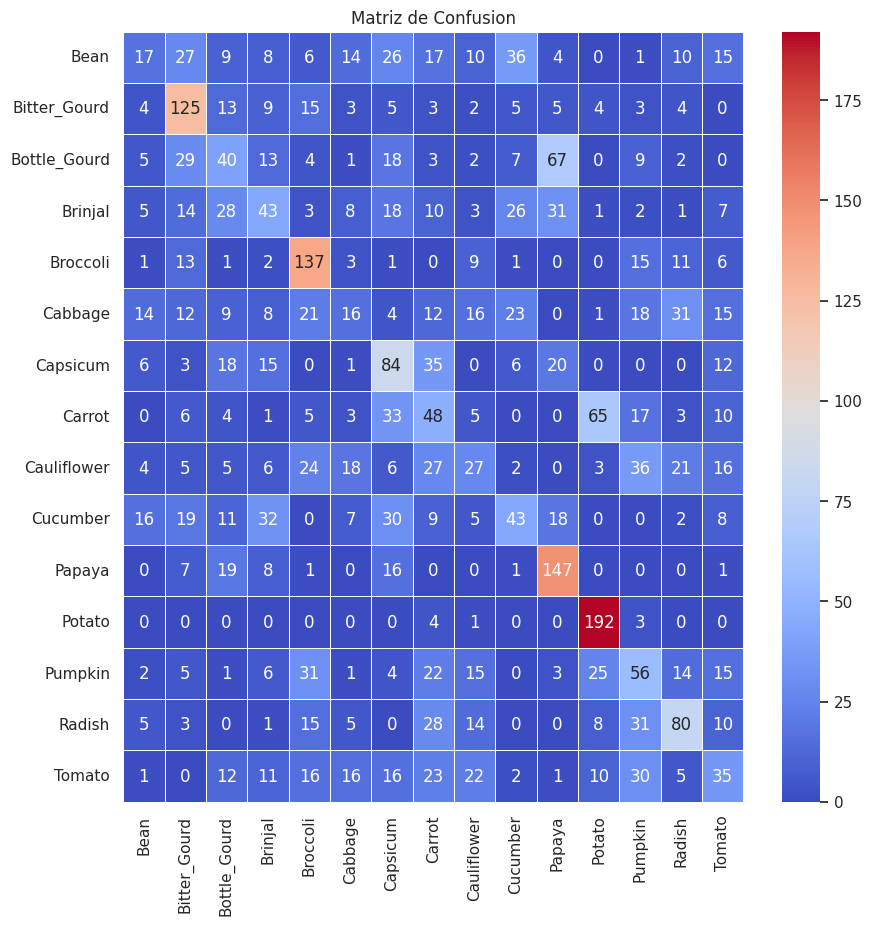

In [ ]:
plot_confusion_matrix(model_2, test_data)

Y obtenemos las curvas de aprendizaje:

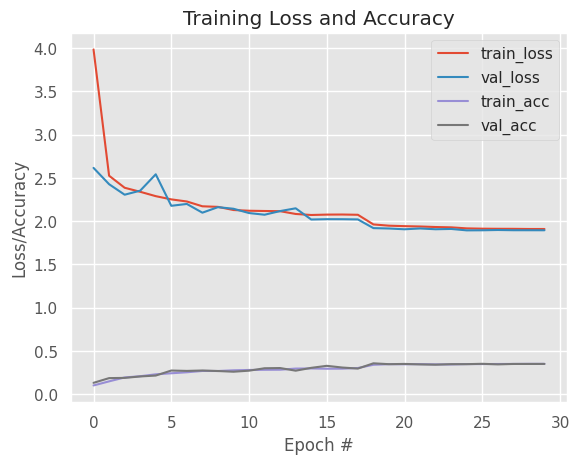

In [ ]:
visualize_learning_curve(history_2)

Comentarios

Ha mejorado la precisión más de 5 veces respecto del caso anterior, pero aín está lejos de ser un modelo aceptable. Se han mejorado las pérdidas, pero la precisión de clasificación es próxima a 1/3 (predice correctamente 1 de cada 3 muestras, aprox.)

### **Modelo 3**

En este modelo probaremos con dos bloques y dos capas convolucionales por bloque.

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Dense
from keras.optimizers import Adam


model_3 = Sequential()

# BASE MODEL
model_3.add(Input((224, 224, 3)))

# Bloque 1
model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(padding='same'))

# Bloque 2
model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_3.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_3.add(GlobalMaxPooling2D())

# TOP MODEL
model_3.add(Dense(15, activation='softmax'))

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 global_max_pooling2d_2 (Gl  (None, 64)                0         
 obalMaxPooling2D)                                    

In [ ]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.1),
                metrics=['accuracy'])

In [ ]:
history_3 = model_3.fit(train_data,
                        epochs=100,
                        batch_size=BATCH_SIZE,
                        validation_data=valid_data,
                        callbacks=[early_stop, check_point, reduce_lr])

Epoch 1/100
118/118 [==============================] - ETA: 0s - loss: 111.1814 - accuracy: 0.0691
Epoch 1: val_loss improved from inf to 2.71141, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==============================] - 123s 857ms/step - loss: 111.1814 - accuracy: 0.0691 - val_loss: 2.7114 - val_accuracy: 0.0667 - lr: 0.1000
Epoch 2/100
118/118 [==============================] - ETA: 0s - loss: 2.7126 - accuracy: 0.0666
Epoch 2: val_loss did not improve from 2.71141
118/118 [==============================] - 92s 775ms/step - loss: 2.7126 - accuracy: 0.0666 - val_loss: 2.7185 - val_accuracy: 0.0667 - lr: 0.1000
Epoch 3/100
118/118 [==============================] - ETA: 0s - loss: 2.7143 - accuracy: 0.0680
Epoch 3: val_loss did not improve from 2.71141
118/118 [==============================] - 90s 763ms/step - loss: 2.7143 - accuracy: 0.0680 - val_loss: 2.7117 - val_accuracy: 0.0667 - lr: 0.1000
Epoch 4/100
118/118 [========================

In [ ]:
model_3.save(BASE_DIR + 'models/' + 'model_3.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tras el entrenamiento evaluamos el modelo con los datos de test:

In [ ]:
model_3.evaluate(test_data)

24/24 [==============================] - 7s 271ms/step - loss: 2.7081 - accuracy: 0.0667


[2.7080941200256348, 0.06666667014360428]

In [ ]:
evaluate_model(model_3, test_data)

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.00      0.00      0.00       200
Bitter_Gourd       0.00      0.00      0.00       200
Bottle_Gourd       0.00      0.00      0.00       200
     Brinjal       0.00      0.00      0.00       200
    Broccoli       0.00      0.00      0.00       200
     Cabbage       0.00      0.00      0.00       200
    Capsicum       0.00      0.00      0.00       200
      Carrot       0.00      0.00      0.00       200
 Cauliflower       0.00      0.00      0.00       200
    Cucumber       0.00      0.00      0.00       200
      Papaya       0.00      0.00      0.00       200
      Potato       0.07      1.00      0.12       200
     Pumpkin       0.00      0.00      0.00       200
      Radish       0.00      0.00      0.00       200
      Tomato       0.00      0.00      0.00       200

    accuracy                           0.07      3000
   m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


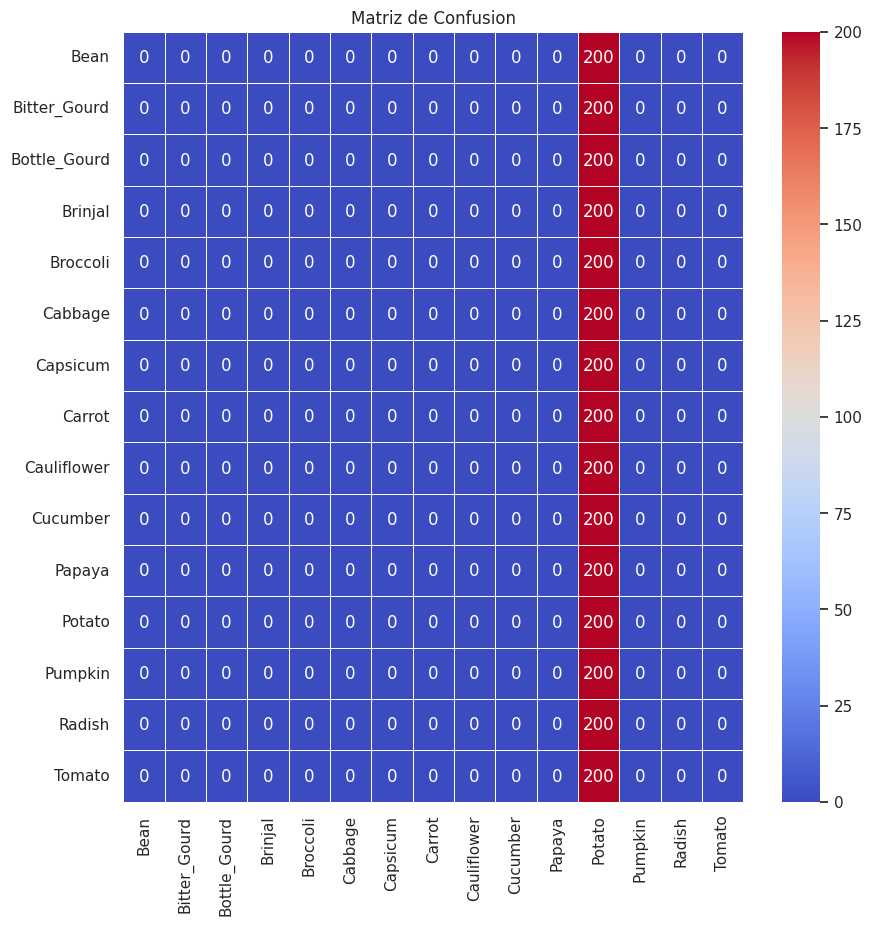

In [ ]:
plot_confusion_matrix(model_3, test_data)

Y obtenemos las curvas de aprendizaje:

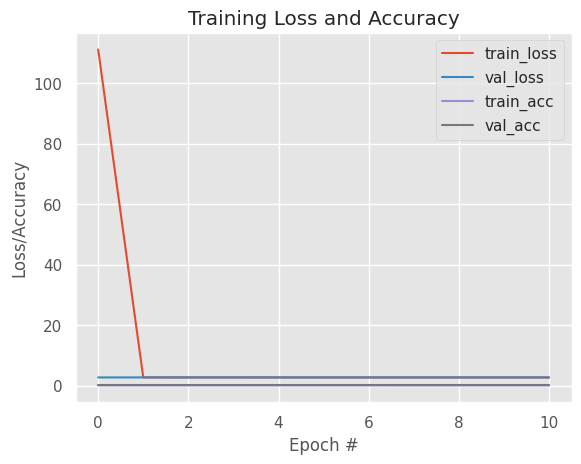

In [ ]:
visualize_learning_curve(history_3)

Comentarios

En este caso aumentar la complejidad del modelo no mejora los resultados. El modelo calsificanuevamete todas las muestras como si pertenecieran a la misma categoría.

### **Modelo 3** con **Data Augmentation**

El modelo anterior (**Modelo 3**) hemos visto que no es capaz de genralizar, Vamos a intentar resolverlos, esta vez **SÍ**, aplicando **Data Augmentation** a los datos de entrenamiento.

Si no mejora es que la arquitectura del modelo no es válida para nuestro problema.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_aug = ImageDataGenerator(rescale=1 / 255.,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 horizontal_flip=True)

train_data_aug = datagen_aug.flow_from_directory(DATA_DIR + 'train/',
                                                 target_size=(224, 224),
                                                 color_mode='rgb',
                                                 class_mode='categorical',
                                                 batch_size=BATCH_SIZE,
                                                 shuffle=True)

Found 15000 images belonging to 15 classes.


In [ ]:
from tensorflow.keras.models import load_model

model_3b = load_model(BASE_DIR + 'models/' + 'model_3.h5')

In [ ]:
model_3b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 global_max_pooling2d_2 (Gl  (None, 64)                0         
 obalMaxPooling2D)                                    

In [ ]:
history_3b = model_3b.fit(train_data_aug,
                          validation_data=valid_data,
                          epochs=100,
                          callbacks = [early_stop, check_point, reduce_lr])

Epoch 1/100
118/118 [==============================] - ETA: 0s - loss: 2.7082 - accuracy: 0.0647
Epoch 1: val_loss improved from inf to 2.70808, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==============================] - 267s 2s/step - loss: 2.7082 - accuracy: 0.0647 - val_loss: 2.7081 - val_accuracy: 0.0667 - lr: 1.0000e-03
Epoch 2/100
118/118 [==============================] - ETA: 0s - loss: 2.7082 - accuracy: 0.0663
Epoch 2: val_loss improved from 2.70808 to 2.70807, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==============================] - 249s 2s/step - loss: 2.7082 - accuracy: 0.0663 - val_loss: 2.7081 - val_accuracy: 0.0667 - lr: 1.0000e-03
Epoch 3/100
118/118 [==============================] - ETA: 0s - loss: 2.7082 - accuracy: 0.0647
Epoch 3: val_loss improved from 2.70807 to 2.70806, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [======================

In [ ]:
model_3b.save(BASE_DIR + 'models/' + 'model_3_data_aug.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tras el entrenamiento evaluamos el modelo con los datos de test:

In [ ]:
model_3b.evaluate(test_data)

24/24 [==============================] - 7s 306ms/step - loss: 2.7081 - accuracy: 0.0667


[2.7080583572387695, 0.06666667014360428]

In [ ]:
evaluate_model(model_3b, test_data)

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.00      0.00      0.00       200
Bitter_Gourd       0.00      0.00      0.00       200
Bottle_Gourd       0.00      0.00      0.00       200
     Brinjal       0.00      0.00      0.00       200
    Broccoli       0.00      0.00      0.00       200
     Cabbage       0.00      0.00      0.00       200
    Capsicum       0.00      0.00      0.00       200
      Carrot       0.00      0.00      0.00       200
 Cauliflower       0.00      0.00      0.00       200
    Cucumber       0.00      0.00      0.00       200
      Papaya       0.07      1.00      0.12       200
      Potato       0.00      0.00      0.00       200
     Pumpkin       0.00      0.00      0.00       200
      Radish       0.00      0.00      0.00       200
      Tomato       0.00      0.00      0.00       200

    accuracy                           0.07      3000
   m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


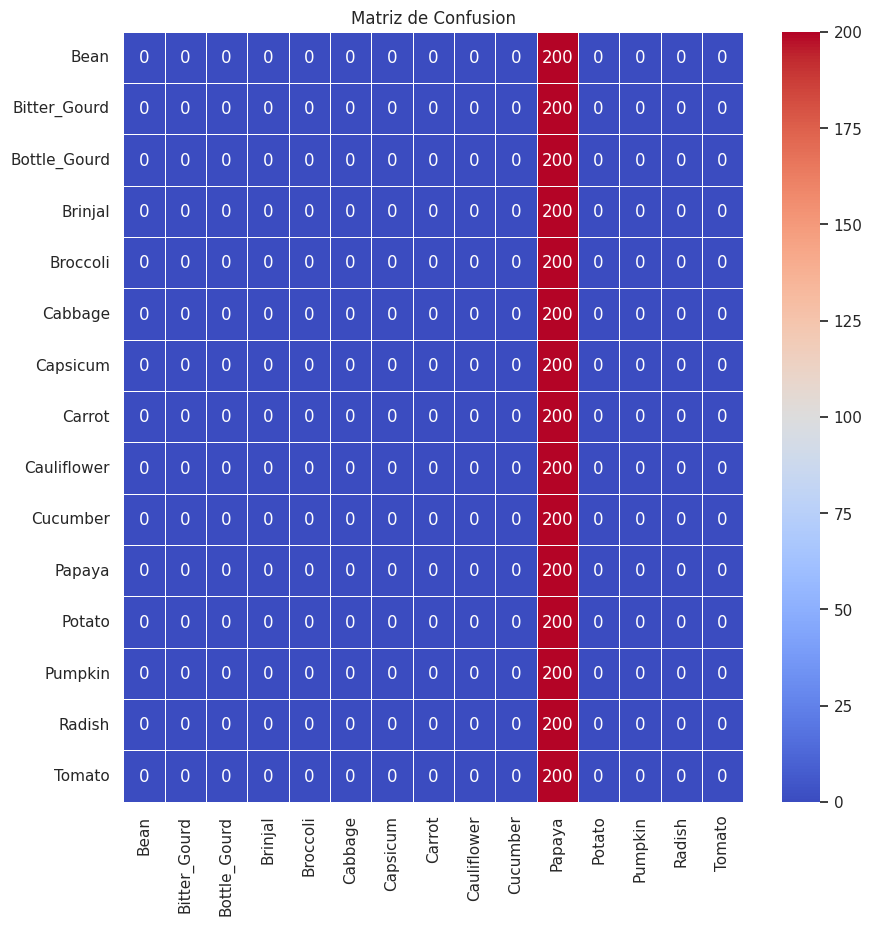

In [ ]:
plot_confusion_matrix(model_3b, test_data)

Y obtenemos las curvas de aprendizaje:

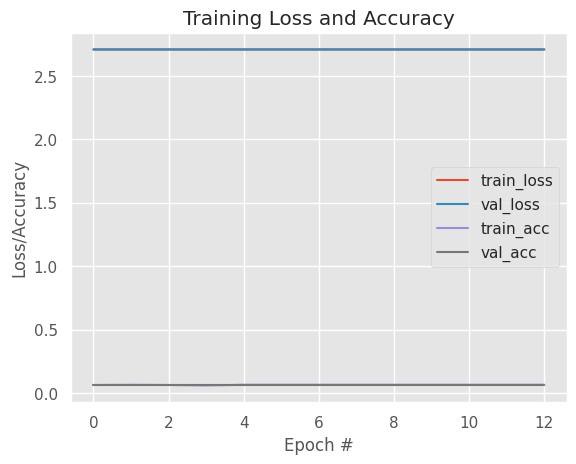

In [ ]:
visualize_learning_curve(history_3b)

Comentarios

Vemos, como habíamos predicho que la arquitectura de este modelo no es apta para este problema.

Comentarios



### **Modelo 4**

Por último, probaremos con tres bloques y dos capas convolucionales por bloque, reduciendo el tamaño de los filtros entre un bloque y el siguiente.

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D, Dense
from keras.optimizers import Adam


model_4 = Sequential()

# BASE MODEL
model_4.add(Input((224, 224, 3)))

# Bloque 1
model_4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(padding='same'))

# Bloque 2
model_4.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_4.add(BatchNormalization())
model_4.add(GlobalMaxPooling2D())

# TOP MODEL
model_4.add(Dense(15, activation='softmax'))

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.1),
                metrics=['accuracy'])

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=100,
                        batch_size=BATCH_SIZE,
                        validation_data=valid_data,
                        callbacks=[early_stop, check_point, reduce_lr])

Epoch 1/100
118/118 [==============================] - ETA: 0s - loss: 3.4737 - accuracy: 0.2407
Epoch 1: val_loss did not improve from 1.89368
118/118 [==============================] - 57s 431ms/step - loss: 3.4737 - accuracy: 0.2407 - val_loss: 4.4277 - val_accuracy: 0.1437 - lr: 0.1000
Epoch 2/100
118/118 [==============================] - ETA: 0s - loss: 1.5538 - accuracy: 0.4903
Epoch 2: val_loss did not improve from 1.89368
118/118 [==============================] - 49s 414ms/step - loss: 1.5538 - accuracy: 0.4903 - val_loss: 2.2504 - val_accuracy: 0.3080 - lr: 0.1000
Epoch 3/100
118/118 [==============================] - ETA: 0s - loss: 1.3025 - accuracy: 0.5844
Epoch 3: val_loss improved from 1.89368 to 1.58077, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==============================] - 49s 415ms/step - loss: 1.3025 - accuracy: 0.5844 - val_loss: 1.5808 - val_accuracy: 0.5083 - lr: 0.1000
Epoch 4/100
118/118 [=========================

In [ ]:
model_4.save(BASE_DIR + 'models/' + 'model_4.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tras el entrenamiento evaluamos el modelo con los datos de test:

In [ ]:
model_4.evaluate(test_data)

24/24 [==============================] - 6s 262ms/step - loss: 0.1747 - accuracy: 0.9440


[0.17470772564411163, 0.9440000057220459]

In [ ]:
evaluate_model(model_4, test_data)

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.95      0.94      0.95       200
Bitter_Gourd       0.94      0.94      0.94       200
Bottle_Gourd       0.97      0.97      0.97       200
     Brinjal       0.92      0.96      0.94       200
    Broccoli       0.92      0.93      0.92       200
     Cabbage       0.93      0.93      0.93       200
    Capsicum       0.98      0.96      0.97       200
      Carrot       0.99      0.98      0.99       200
 Cauliflower       0.91      0.91      0.91       200
    Cucumber       0.94      0.94      0.94       200
      Papaya       0.93      0.94      0.94       200
      Potato       0.97      0.99      0.98       200
     Pumpkin       0.90      0.86      0.88       200
      Radish       0.96      0.97      0.97       200
      Tomato       0.95      0.93      0.94       200

    accuracy                           0.94      3000
   m

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


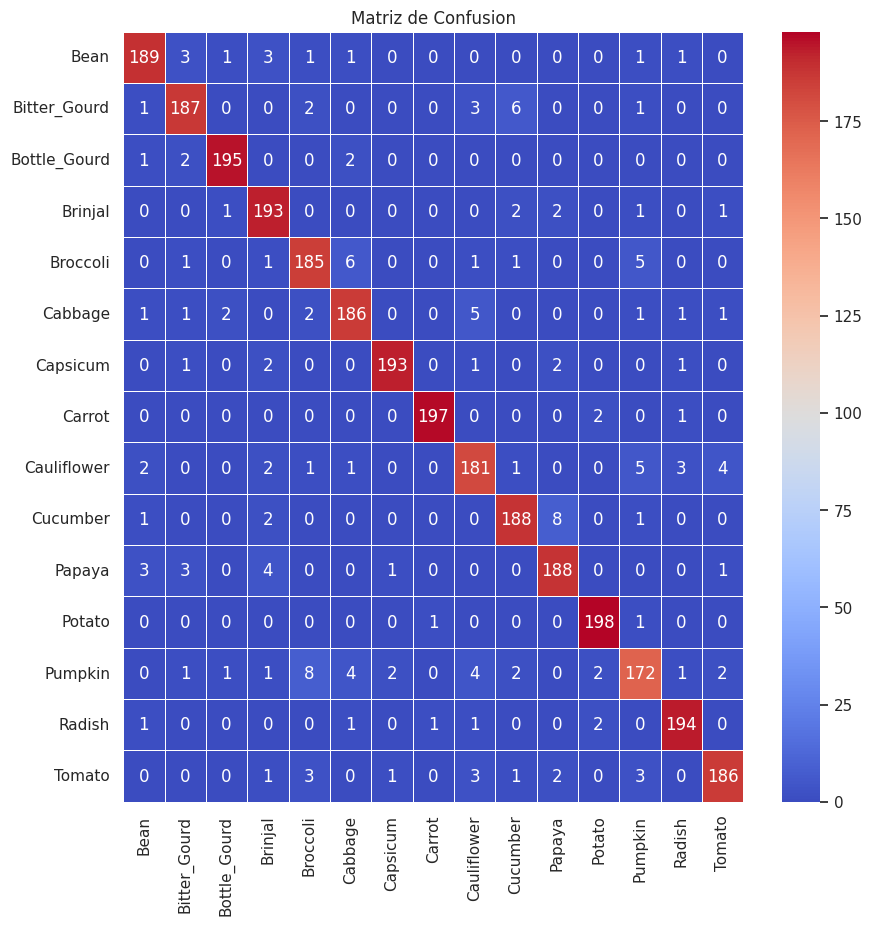

In [ ]:
plot_confusion_matrix(model_4, test_data)

Y obtenemos las curvas de aprendizaje:

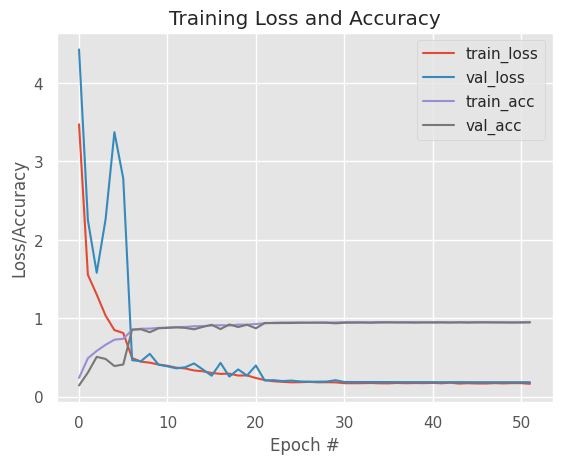

In [ ]:
visualize_learning_curve(history_4)

Comentarios

Con este modelo hemos obtenido muy buenos resultados, con un porcentaje de precisión de casi el 95%. Las curvas de aprendizaje muestran que la mejora ha sido contínua durante el entrenamiento (salvo por los cambios en el *learning rate* introducidos por la función *callback*).

Además, hay que tener en cuenta que ambas capas contienen el mismo número de filtros, en vez de aumentar su número como suele ser habitual. La mejora respecto al segundo modelo viene dada por la inclusión de *Batch Normalization*, mejorando en casi 3 veces la precisión del modelo.

### **Modelo 5**

Para no extender en exceso la búsqueda de los mejores hiperparámetros vamos a hacer una búsqueda más exhaustiva y optimizar los hiperparámetros de diferentes modelos haciendo uso de **Hyperband Tuner** de **Keras Tuner**

Exploraremos soluciones:
- Entre uno y tres bloques
- Con una o dos capas convolucionales por bloque
- Tamaños de filtro de (3 x 3), (5 x 5) o (7 x 7),
- Posibilidad de incluir o no Batch Normalization en cada capa
- Posibilidad de incluir o no Dropout en cada bloque
- Learning rate inicial entre 0.1 (1e-1) y 0.000001 (1e-6)

In [ ]:
%%capture

!pip install -q -U keras-tuner
!pip install keras-tuner --upgrade

In [ ]:
import tensorflow as tf
import IPython

class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy


def model_5_builder(hp):
  model = Sequential()
  model.add(Input((224, 224, 3)))

  # Hiperparámetros
  n_bloques = hp.Int('bloques', min_value = 1, max_value = 3, step = 1)
  n_capas = hp.Int('capas', min_value = 1, max_value = 2, step = 1)
  kernel_size = hp.Int('kernel', min_value = 3, max_value = 7, step = 2)
  batch_norm = hp.Boolean("batch_normalization")
  dropout = hp.Boolean("dropout")

  # Bloques
  filtros_prev = None
  for i in range(n_bloques):
    for j in range(n_capas):
      if i == 0:
        n_filtros = hp.Int('filtros_' + str(i+1), min_value = 32, max_value = 128, step = 32)
      else:
        n_filtros_prev = n_filtros   # Filtros de la capa previa
        n_filtros = hp.Int('filtros_'  + str(i+1), min_value = n_filtros_prev, max_value = 128, step = 32)
      model.add(Conv2D(n_filtros, (kernel_size, kernel_size), padding='same', activation='relu'))

      if batch_norm:
        model.add(BatchNormalization())

    if dropout:
      model.add(Dropout(rate=0.2))

    if i+1 < n_bloques:
      model.add(MaxPooling2D(padding='same'))

  model.add(GlobalMaxPooling2D())

  model.add(Dense(15, activation='softmax'))

  # Learning rate
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6])

  model.compile(optimizer = Adam(learning_rate=hp_learning_rate),
                loss = CategoricalCrossentropy(),
                metrics = ['accuracy'])

  return model

In [ ]:
import os
import keras_tuner as kt

if not os.path.exists(BASE_DIR + 'keras_tuner/'):
  os.mkdir(BASE_DIR + 'keras_tuner/')

tuner_5 = kt.Hyperband(model_5_builder,
                       objective='val_accuracy',
                       max_epochs=32,
                       factor=2,
                       directory=BASE_DIR + 'keras_tuner',
                       project_name='model_5')

Reloading Tuner from /content/drive/MyDrive/07MIAR_Proyecto_Programacion/keras_tuner/model_5/tuner0.json


In [ ]:
tuner_5.search(train_data, epochs=64, validation_data=valid_data,
               callbacks=[early_stop, check_point, reduce_lr, ClearTrainingOutput()])

  > Detenida la búsqueda tras 100 iteraciones (*trials*)

In [ ]:
best_hps_5 = tuner_5.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
list_filtros = []
for i in range(best_hps_5.get('bloques')):
  list_filtros.append(best_hps_5.get('filtros_' + str(i+1)))


print(f"""
Se ha completado la búsqueda de hiperparámetros.
> El learning rate óptimo es: {best_hps_5.get('learning_rate')}
> El número óptimo de bloques es: {best_hps_5.get('bloques')}
> El número óptimo de capas es: {best_hps_5.get('capas')}
> Los tamaños óptimos de filtros, para cada bloque, son: {list_filtros}.
> Con Batch Normalization: {best_hps_5.get('batch_normalization')}.
> Con Dropout: {best_hps_5.get('dropout')}.
""")


Se ha completado la búsqueda de hiperparámetros.
> El learning rate óptimo es: 0.01
> El número óptimo de bloques es: 3
> El número óptimo de capas es: 1
> Los tamaños óptimos de filtros, para cada bloque, son: [32, 128, 128].
> Con Batch Normalization: True.
> Con Dropout: False.



In [ ]:
tuner_5.results_summary()

Results summary
Results in /content/drive/MyDrive/07MIAR_Proyecto_Programacion/keras_tuner/model_5
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0094 summary
Hyperparameters:
bloques: 3
capas: 1
kernel: 7
batch_normalization: True
dropout: False
filtros_1: 32
learning_rate: 0.01
filtros_2: 128
filtros_3: 128
tuner/epochs: 16
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.9769999980926514

Trial 0064 summary
Hyperparameters:
bloques: 3
capas: 2
kernel: 7
batch_normalization: False
dropout: True
filtros_1: 32
learning_rate: 0.0001
filtros_2: 128
filtros_3: 128
tuner/epochs: 8
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 2
tuner/trial_id: 0057
Score: 0.968999981880188

Trial 0088 summary
Hyperparameters:
bloques: 2
capas: 1
kernel: 7
batch_normalization: False
dropout: False
filtros_1: 32
learning_rate: 0.001
filtros_2: 128
filtros_3: 128
tuner/epochs: 16
tuner/initial_epoch: 8
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0085
Sc

Recuperamos el mejor modelo:

In [ ]:
model_5 = tuner_5.get_best_models()[0]

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      4736      
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     200832    
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 128)     512       
 chNormalization)                                                
                                                        

Entrenamos el mejor modelo obtenido para ajustarlo por completo y determinar el número de épocas de entrenamiento. Para la selección únicamente se entrena dureante unas pocas épocas, pero no se obtiene un modelo completamente entrenado.

Ver [documentación](https://www.tensorflow.org/tutorials/keras/keras_tuner)

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=100,
                        batch_size=BATCH_SIZE,
                        validation_data=valid_data,
                        callbacks=[early_stop, check_point, reduce_lr])

Epoch 1/100
118/118 [==============================] - ETA: 0s - loss: 0.0326 - accuracy: 0.9897
Epoch 1: val_loss improved from inf to 0.27071, saving model to /content/drive/MyDrive/07MIAR_Proyecto_Programacion/models/
118/118 [==============================] - 102s 741ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.2707 - val_accuracy: 0.9307 - lr: 0.0100
Epoch 2/100
118/118 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9957
Epoch 2: val_loss did not improve from 0.27071
118/118 [==============================] - 86s 725ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.9858 - val_accuracy: 0.8233 - lr: 0.0100
Epoch 3/100
118/118 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 0.9890
Epoch 3: val_loss did not improve from 0.27071
118/118 [==============================] - 89s 750ms/step - loss: 0.0318 - accuracy: 0.9890 - val_loss: 0.2717 - val_accuracy: 0.9317 - lr: 0.0100
Epoch 4/100
118/118 [============================

In [ ]:
model_5.save(BASE_DIR + 'models/' + 'model_5.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tras el entrenamiento evaluamos el modelo con los datos de test:

In [ ]:
model_5.evaluate(test_data)

24/24 [==============================] - 8s 317ms/step - loss: 0.0353 - accuracy: 0.9930


[0.0352507159113884, 0.9929999709129333]

In [ ]:
evaluate_model(model_5, test_data)

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.99      0.99      0.99       200
Bitter_Gourd       1.00      0.99      1.00       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       0.99      0.99      0.99       200
    Broccoli       1.00      0.99      0.99       200
     Cabbage       0.98      0.99      0.98       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       0.98      0.97      0.97       200
    Cucumber       1.00      1.00      1.00       200
      Papaya       0.99      0.99      0.99       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.98      0.98      0.98       200
      Radish       1.00      1.00      1.00       200
      Tomato       0.98      0.98      0.98       200

    accuracy                           0.99      3000
   m

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


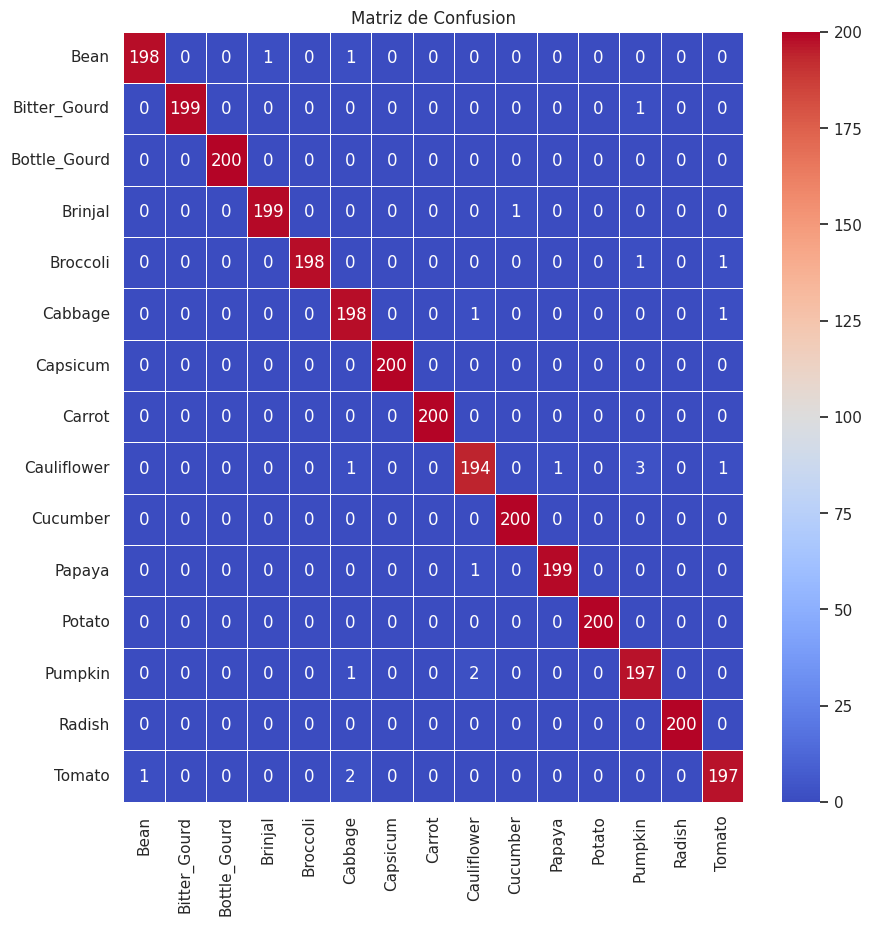

In [ ]:
plot_confusion_matrix(model_5, test_data)

Y obtenemos las curvas de aprendizaje:

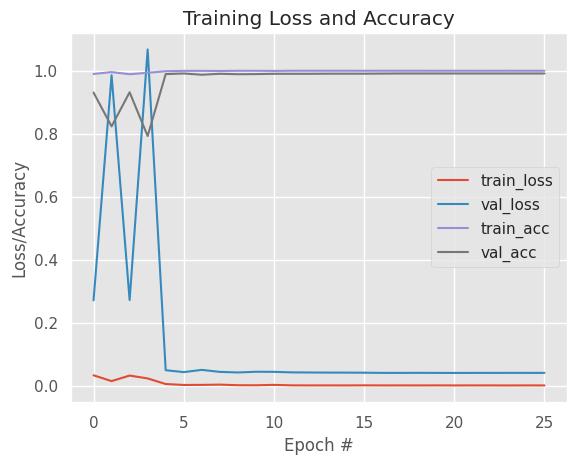

In [ ]:
visualize_learning_curve(history_5)

# Estrategia 2: Red pre-entrenada

En este paso vamos a utilizar 3 redes pre-entrenadas que utilizan la base de ImageNet: ResNet50, VGG16 y VGG19. Para ello vamos a realizar en primer lugar el transfer learning de cada una y, posteriormente, el fine-tuning del modelo para intentar mejorar los resultados (si aplica).

## ResNet-50

Preprocesamos los datos como en el modelo preentrenado:

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_resnet50 = ImageDataGenerator(rescale=1 / 255.,
                                      preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

train_data_resnet50 = datagen_resnet50.flow_from_directory(DATA_DIR + 'train/',
                                         target_size=(224, 224),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

valid_data_resnet50 = datagen_resnet50.flow_from_directory(DATA_DIR + 'validation/',
                                         target_size=(224, 224),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=False)

test_data_resnet50 = datagen_resnet50.flow_from_directory(DATA_DIR + 'test/',
                                        target_size=(224, 224),
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


### **Transfer Learning**


Transfer learning es la primera técnica que vamos a usar para intentar mejorar los resultados obtenidos en la "estrategia 1" de la práctica. Con esto vamos a intentar aprovechar el conocimiento adquirido durante el entrenamiento del modelo o arquitectura ResNet50 con nuestro dataset de datos sin tener que entrenar el modelo completo desde cero.

Cargar arquitectura y pesos

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model_resnet = ResNet50(weights="imagenet",
                             include_top=False,
                             pooling=None,
                             classifier_activation='softmax',
                             input_shape=(224, 224, 3))

Mostramos un resumen de la arquitectura de la red ResNet50

In [ ]:
base_model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

Creando el top model y congelando TODAS las capas convolucionales

En Transfer Learning no vamos a entrenar el base model. Asumimos por defecto la red ResNet50

In [ ]:
base_model_resnet.trainable = False

Conectamos el modelo con el top model. El top model consta de dos capas densas con función de activación "relu" y la de salida con función de activación "softmax" por ser una clasificación multiclase.




In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

pre_trained_model = Sequential()
pre_trained_model.add(base_model_resnet)
pre_trained_model.add(Flatten())
pre_trained_model.add(Dense(256, activation="relu"))
pre_trained_model.add(Dense(128, activation="relu"))
pre_trained_model.add(Dense(15, activation="softmax"))

In [ ]:
pre_trained_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_9 (Dense)             (None, 256)               25690368  
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 15)                1935      
                                                                 
Total params: 49312911 (188.11 MB)
Trainable params: 25725199 (98.13 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


Entrenamos la solución

In [ ]:
from tensorflow.keras.optimizers import Adam

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001),
                          loss="categorical_crossentropy",
                          metrics=["accuracy"])

Realizamos el entrenamiento:

In [ ]:

print("[INFO]: Entrenando la red neuronal...")
H = pre_trained_model.fit(train_data_resnet50,
                          epochs=25,
                          batch_size=BATCH_SIZE,
                          validation_data=(valid_data_resnet50),
                          callbacks=[early_stop])

[INFO]: Entrenando la red neuronal...
Epoch 1/25
118/118 [==============================] - 80s 602ms/step - loss: 3.1496 - accuracy: 0.2323 - val_loss: 1.9314 - val_accuracy: 0.4153
Epoch 2/25
118/118 [==============================] - 71s 603ms/step - loss: 1.7457 - accuracy: 0.4561 - val_loss: 1.5192 - val_accuracy: 0.5277
Epoch 3/25
118/118 [==============================] - 78s 658ms/step - loss: 1.4620 - accuracy: 0.5507 - val_loss: 1.3507 - val_accuracy: 0.5970
Epoch 4/25
118/118 [==============================] - 69s 586ms/step - loss: 1.2498 - accuracy: 0.6173 - val_loss: 1.1634 - val_accuracy: 0.6343
Epoch 5/25
118/118 [==============================] - 70s 590ms/step - loss: 1.1060 - accuracy: 0.6584 - val_loss: 1.0354 - val_accuracy: 0.6770
Epoch 6/25
118/118 [==============================] - 68s 571ms/step - loss: 1.0795 - accuracy: 0.6658 - val_loss: 1.1121 - val_accuracy: 0.6583
Epoch 7/25
118/118 [==============================] - 68s 574ms/step - loss: 0.9907 - accura

Conclusiones del entrenamiento:
- Podemos observar que tenemos algo de Overfitting.
- A partir de la etapa 10, empezamos a tener picos de subidas y bajadas en val_accuracy sin obtener la convergencia del modelo, tal y como deseamos en los resultados.

Guardamos el modelo

In [ ]:
pre_trained_model.save(BASE_DIR + 'models/' + 'pre_trained_model_ResNet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tras el entrenamiento evaluamos el modelo con los datos de test:

In [ ]:
resnet50_score = pre_trained_model.evaluate(test_data_resnet50)

24/24 [==============================] - 12s 476ms/step - loss: 0.8961 - accuracy: 0.7127


Evaluamos el modelo de predicción con las imágenes de test

In [ ]:
evaluate_model(pre_trained_model, test_data_resnet50)

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.97      0.61      0.75       200
Bitter_Gourd       0.61      0.95      0.75       200
Bottle_Gourd       0.96      0.83      0.89       200
     Brinjal       0.91      0.54      0.68       200
    Broccoli       0.95      0.81      0.88       200
     Cabbage       0.75      0.79      0.77       200
    Capsicum       0.66      0.76      0.71       200
      Carrot       0.48      0.98      0.64       200
 Cauliflower       0.96      0.58      0.73       200
    Cucumber       0.85      0.80      0.82       200
      Papaya       1.00      0.29      0.45       200
      Potato       0.76      0.50      0.60       200
     Pumpkin       0.41      0.96      0.57       200
      Radish       0.86      0.81      0.83       200
      Tomato       1.00      0.48      0.65       200

    accuracy                           0.71      3000
   m

Mostramos la matriz de confusion:

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


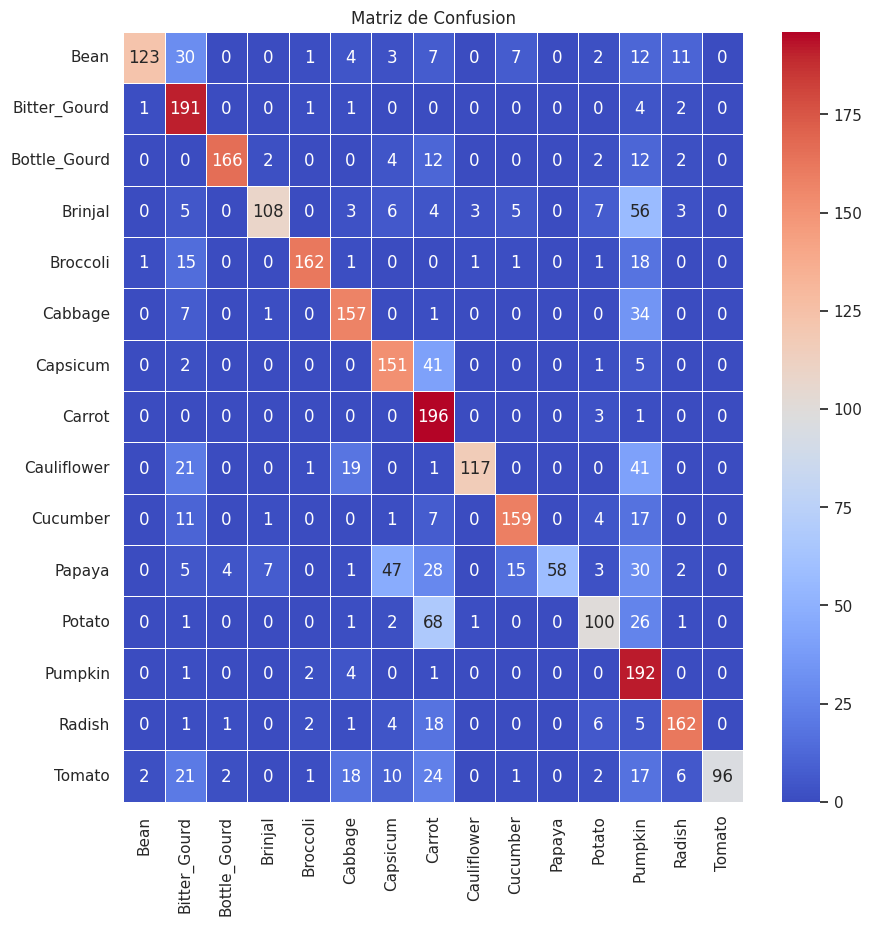

In [ ]:
plot_confusion_matrix(pre_trained_model, test_data_resnet50)

Y obtenemos las curvas de aprendizaje:

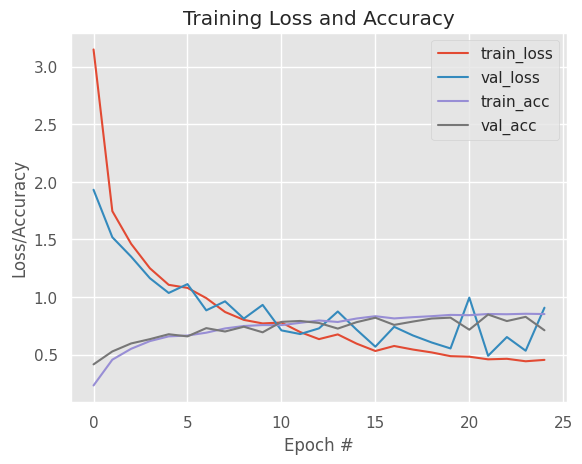

In [ ]:
visualize_learning_curve(H)

Como conclusiones, hemos observado que llegamos a un máximo de 0,85 de Accuracy. Consideramos un poco bajo este valor, además de que tanto en validación y en test nos quedamos lejos de los resultados de entrenamiento provocando overfitting.
A continuacion vamos a aplicar la técnica de Fine Tuning, descongelando alguna capa convolucional del base model usado.
Otras técnicas que podríamos aplicar para abordar este Overfitting podria ser regularización, aumento de datos o incluso intentar reducir la complejidad del modelo.



### **Fine tuning**

En esta primera configuración vamos a descongelar únicamente la última capa hasta "conv4_block6_3_conv".

Cargar arquitectura y pesos

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model_resnet = ResNet50(weights="imagenet",
                             include_top=False,
                             input_shape=(224, 224, 3))

Congelamos parcialmente *base_model_resnet*

In [ ]:
for layer in base_model_resnet.layers:
  if layer.name == "conv4_block6_3_conv":
    break
  layer.trainable = False
  # print("Capa " + layer.name + " congelada...")

Conectar el modelo con el top model. Misma arquitectura usada en Transfer Learning.



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

pre_trained_model = Sequential()
pre_trained_model.add(base_model_resnet)
pre_trained_model.add(Flatten())
pre_trained_model.add(Dense(256, activation="relu"))
pre_trained_model.add(Dense(128, activation="relu"))
pre_trained_model.add(Dense(15, activation="softmax"))

In [ ]:
pre_trained_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 256)               25690368  
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 15)                1935      
                                                                 
Total params: 49312911 (188.11 MB)
Trainable params: 40966415 (156.27 MB)
Non-trainable params: 8346496 (31.84 MB)
_________________________________________________________________


Compilamos el modelo y entrenamos

In [ ]:
from tensorflow.keras.optimizers import Adam

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

In [ ]:
print("[INFO]: Entrenando la red neuronal...")
H = pre_trained_model.fit(train_data_resnet50,
                          epochs=25,
                          batch_size=BATCH_SIZE,
                          validation_data=(valid_data_resnet50),
                          callbacks=[early_stop])

[INFO]: Entrenando la red neuronal...
Epoch 1/25
118/118 [==============================] - 92s 682ms/step - loss: 3.6935 - accuracy: 0.1331 - val_loss: 3.6929 - val_accuracy: 0.1237
Epoch 2/25
118/118 [==============================] - 78s 660ms/step - loss: 1.8892 - accuracy: 0.3489 - val_loss: 10.6927 - val_accuracy: 0.1037
Epoch 3/25
118/118 [==============================] - 78s 662ms/step - loss: 1.2755 - accuracy: 0.5809 - val_loss: 8.7938 - val_accuracy: 0.1120
Epoch 4/25
118/118 [==============================] - 88s 744ms/step - loss: 0.8952 - accuracy: 0.7114 - val_loss: 14.9281 - val_accuracy: 0.1390
Epoch 5/25
118/118 [==============================] - 79s 669ms/step - loss: 0.6635 - accuracy: 0.7853 - val_loss: 34.6189 - val_accuracy: 0.0807
Epoch 6/25
118/118 [==============================] - 78s 662ms/step - loss: 0.5175 - accuracy: 0.8309 - val_loss: 18.4673 - val_accuracy: 0.1407
Epoch 6: early stopping


Nos salta el Callback de early_stop ya que si no mejora en el entrenamiento para de entrenar sin completar todas las etapas.

In [ ]:
pre_trained_model.save(BASE_DIR + 'models/' + 'pre_trained_model_ResNet50_ft.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tras el entrenamiento evaluamos el modelo con los datos de test:

In [ ]:
resnet50_ft_score = pre_trained_model.evaluate(test_data_resnet50)

24/24 [==============================] - 12s 476ms/step - loss: 3.6661 - accuracy: 0.1183


In [ ]:
evaluate_model(pre_trained_model, test_data_resnet50)

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.00      0.00      0.00       200
Bitter_Gourd       0.28      0.59      0.38       200
Bottle_Gourd       0.07      0.03      0.04       200
     Brinjal       0.00      0.00      0.00       200
    Broccoli       0.00      0.00      0.00       200
     Cabbage       0.16      0.03      0.04       200
    Capsicum       0.08      0.69      0.14       200
      Carrot       0.00      0.00      0.00       200
 Cauliflower       0.00      0.00      0.00       200
    Cucumber       0.00      0.00      0.00       200
      Papaya       0.00      0.00      0.00       200
      Potato       0.16      0.26      0.19       200
     Pumpkin       0.05      0.08      0.07       200
      Radish       0.00      0.00      0.00       200
      Tomato       0.18      0.09      0.12       200

    accuracy                           0.12      3000
   m

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


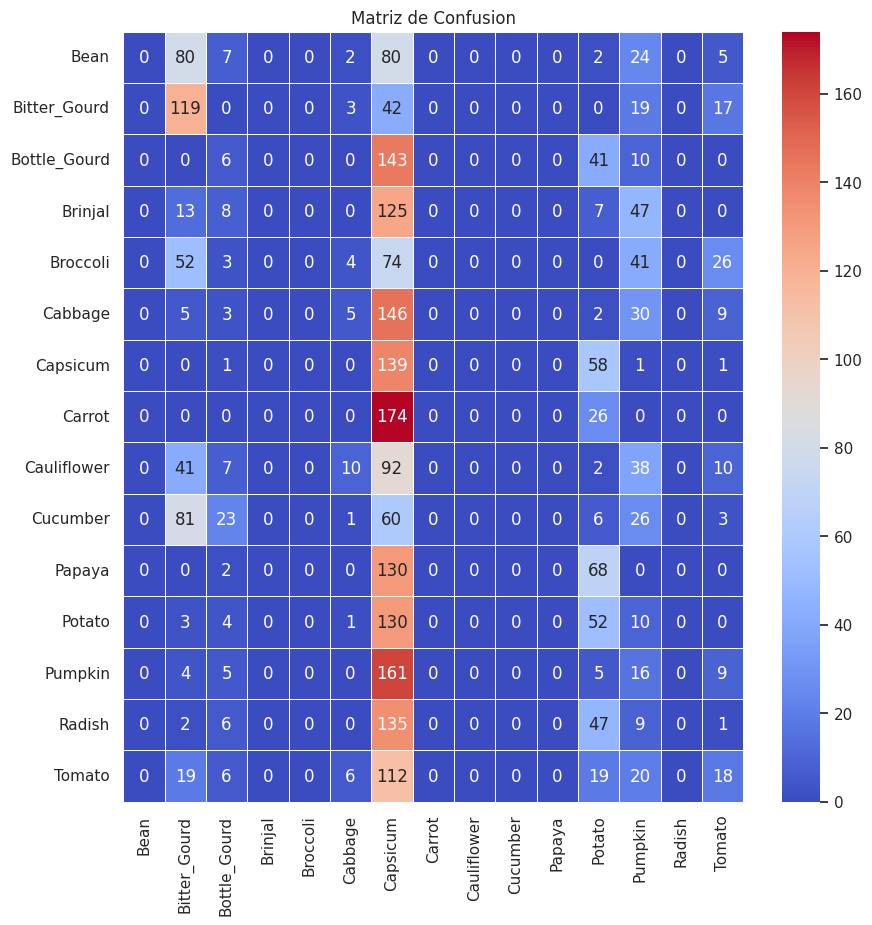

In [ ]:
plot_confusion_matrix(pre_trained_model, test_data_resnet50)

Y obtenemos las curvas de aprendizaje:

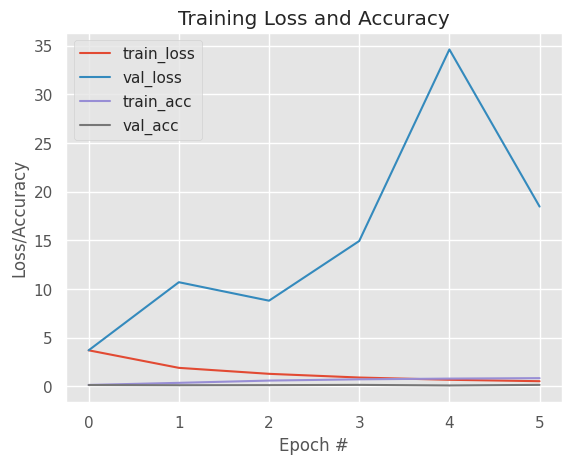

In [ ]:
visualize_learning_curve(H)

En base a los resultados, comprobamos que han empeorado considerablemente con respecto a los obtenidos sin descongelar capas. Por lo tanto, vamos a probar otra configuración distinta de Fine Tuning pero descongelando solo hasta "conv5_block3_2_conv" para intentar que mejoren los resultados.

### **Fine Ttning II**

Repetimos el proceso, descongelando menos capas y evaluando el desempeño

Congelamos parcialmente base_model_resnet

Cargar arquitectura y pesos

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model_resnet = ResNet50(weights="imagenet",
                             include_top=False,
                             input_shape=(224, 224, 3))

Congelamos parcialmente *base_model_resnet*

In [ ]:
for layer in base_model_resnet.layers:
  if layer.name == "conv5_block3_2_conv":
    break
  layer.trainable = False
  # print("Capa " + layer.name + " congelada...")

Conectar el modelo con el top model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

pre_trained_model = Sequential()
pre_trained_model.add(base_model_resnet)
pre_trained_model.add(Flatten())
pre_trained_model.add(Dense(256, activation="relu"))
pre_trained_model.add(Dense(128, activation="relu"))
pre_trained_model.add(Dense(15, activation="softmax"))

Compilamos el modelo y entrenamos

In [ ]:
from tensorflow.keras.optimizers import Adam

pre_trained_model.compile(optimizer=Adam(learning_rate=0.001),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])

In [ ]:
print("[INFO]: Entrenando la red neuronal...")
H = pre_trained_model.fit(train_data_resnet50,
                          epochs=25,
                          batch_size=BATCH_SIZE,
                          validation_data=(valid_data_resnet50),
                          callbacks=[early_stop])

[INFO]: Entrenando la red neuronal...
Epoch 1/25
118/118 [==============================] - 84s 668ms/step - loss: 3.0904 - accuracy: 0.2263 - val_loss: 6.8775 - val_accuracy: 0.1383
Epoch 2/25
118/118 [==============================] - 89s 753ms/step - loss: 1.6559 - accuracy: 0.4715 - val_loss: 3.2720 - val_accuracy: 0.2393
Epoch 3/25
118/118 [==============================] - 72s 607ms/step - loss: 1.2789 - accuracy: 0.5957 - val_loss: 2.6634 - val_accuracy: 0.3723
Epoch 4/25
118/118 [==============================] - 69s 581ms/step - loss: 1.0060 - accuracy: 0.6843 - val_loss: 1.3426 - val_accuracy: 0.5603
Epoch 5/25
118/118 [==============================] - 69s 579ms/step - loss: 0.9314 - accuracy: 0.7033 - val_loss: 1.0638 - val_accuracy: 0.6493
Epoch 6/25
118/118 [==============================] - 67s 565ms/step - loss: 0.8164 - accuracy: 0.7409 - val_loss: 1.7236 - val_accuracy: 0.5133
Epoch 7/25
118/118 [==============================] - 68s 573ms/step - loss: 0.7383 - accura

Conclusión de resultados de entrenamiento:
- Observamos un Overffiting mayor que el obtenido en con la técnica de Transfer Learning.
- Los resultados han mejorado considerablemente en esta configuración de Fine con respecto a la anterior, pero sin llegar a ser buenos
- Llegamos a la conclusión de que esta arquitectura de red podría no ser recomendable para nuestro dataset ya que revisando no conseguimos buenos resultados.

In [ ]:
pre_trained_model.save(BASE_DIR + 'models/' + 'pre_trained_model_ResNet50_ft_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Tras el entrenamiento evaluamos el modelo con los datos de test:

In [ ]:
resnet50_ft_score = pre_trained_model.evaluate(test_data_resnet50)

24/24 [==============================] - 12s 476ms/step - loss: 0.6757 - accuracy: 0.7817


In [ ]:
evaluate_model(pre_trained_model, test_data_resnet50)

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.73      0.85      0.79       200
Bitter_Gourd       0.94      0.83      0.88       200
Bottle_Gourd       0.85      0.95      0.90       200
     Brinjal       0.78      0.73      0.76       200
    Broccoli       0.82      0.88      0.85       200
     Cabbage       0.72      0.81      0.76       200
    Capsicum       0.98      0.56      0.71       200
      Carrot       0.95      0.58      0.72       200
 Cauliflower       0.67      0.86      0.75       200
    Cucumber       0.92      0.79      0.85       200
      Papaya       0.93      0.76      0.84       200
      Potato       0.53      0.90      0.67       200
     Pumpkin       0.96      0.51      0.67       200
      Radish       0.69      0.92      0.79       200
      Tomato       0.80      0.79      0.79       200

    accuracy                           0.78      3000
   m

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


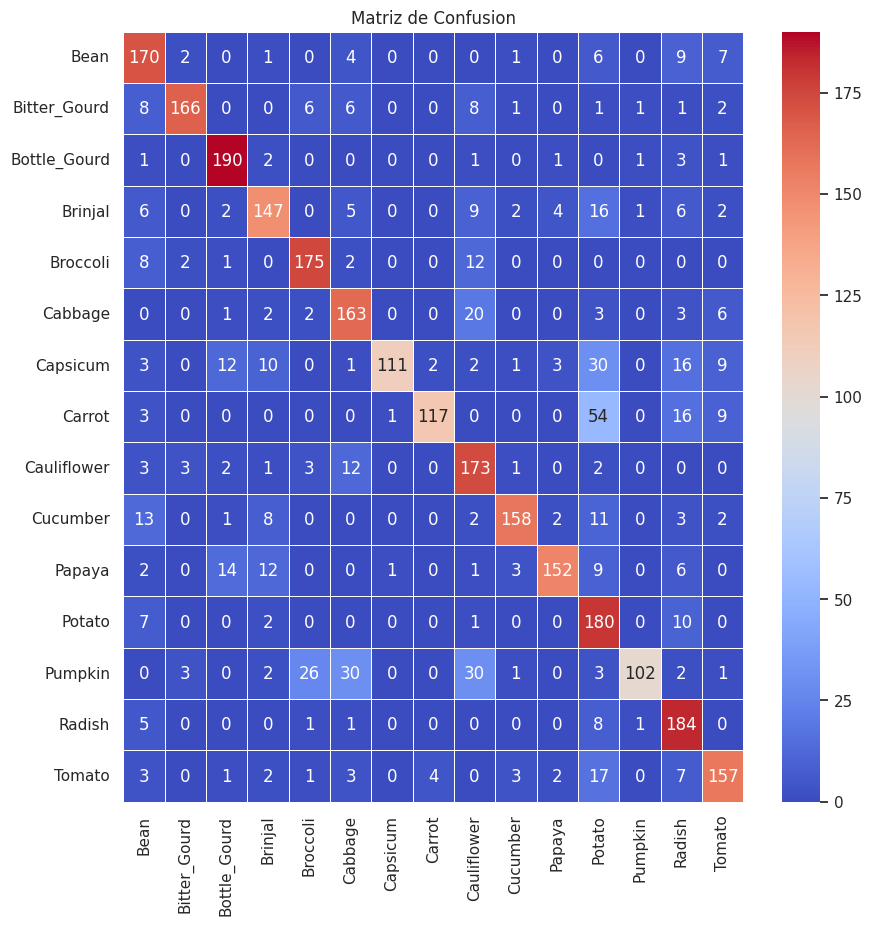

In [ ]:
plot_confusion_matrix(pre_trained_model, test_data_resnet50)

Y obtenemos las curvas de aprendizaje:

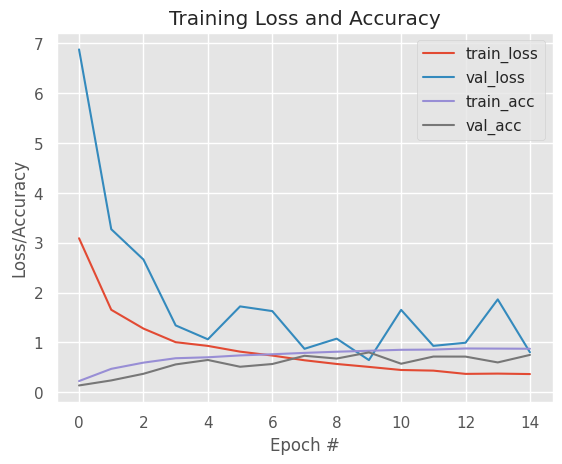

In [ ]:
visualize_learning_curve(H)

Revisando las grafica de los resultados proporcionados por ResNet50, vemos que seguramente podamos mejorar los resultados utilizando otras arquitecturas que se puedan adaptar mejor a nuestro dataset.

A continuación, vamos a probar si mejoramos los resultados aplicando VGG-16 y VGG-19.

## VGG-16

In [ ]:
from keras.layers import Flatten, Dense
from keras.optimizers import Adam

### **Transfer Learning**

Cargamos el modelo pre-entrenado y congelamos las capas del modelo

In [ ]:
from tensorflow.keras.applications import VGG16

model_vgg16 = VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classifier_activation='softmax'
)

model_vgg16.trainable = False

Creamos un nuevo conjunto de datos utilizando el preprocesado necesario para utilizar el modelo VGG16


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_vgg16 = ImageDataGenerator(rescale=1 / 255.,
                                   preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_data_vgg16 = datagen_vgg16.flow_from_directory(DATA_DIR + 'train/',
                                         target_size=(224, 224),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

valid_data_vgg16 = datagen_vgg16.flow_from_directory(DATA_DIR + 'validation/',
                                         target_size=(224, 224),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=False)

test_data_vgg16 = datagen_vgg16.flow_from_directory(DATA_DIR + 'test/',
                                        target_size=(224, 224),
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


Creamos el nuevo modelo

In [ ]:
from keras.models import Model

top_model = Flatten()(model_vgg16.output)
top_model = Dense(256, activation='relu')(top_model)
output_layer = Dense(15, activation='softmax')(top_model)
vgg16_model_fin = Model(inputs=model_vgg16.input, outputs=output_layer)

vgg16_model_fin.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Definimos los hiperparámetros del nuevo modelo y compilamos

In [ ]:
# Definicion de hiperparametros
batch_size = 32
learning_rate = 0.001
epochs = 6
num_clases = 15

# Compilamos el modelo
vgg16_model_fin.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"]
                      )

Entrenamos el modelo y observamos la gráfica de pérdida y precisión

[INFO]: Entrenando la red neuronal...
Epoch 1/6
118/118 [==============================] - 90s 751ms/step - loss: 0.7021 - accuracy: 0.8729 - val_loss: 0.0595 - val_accuracy: 0.9900
Epoch 2/6
118/118 [==============================] - 88s 743ms/step - loss: 0.0269 - accuracy: 0.9969 - val_loss: 0.0334 - val_accuracy: 0.9933
Epoch 3/6
118/118 [==============================] - 81s 681ms/step - loss: 0.0094 - accuracy: 0.9996 - val_loss: 0.0289 - val_accuracy: 0.9927
Epoch 4/6
118/118 [==============================] - 80s 678ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 0.9933
Epoch 5/6
118/118 [==============================] - 80s 680ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0206 - val_accuracy: 0.9947
Epoch 6/6
118/118 [==============================] - 87s 735ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0200 - val_accuracy: 0.9947


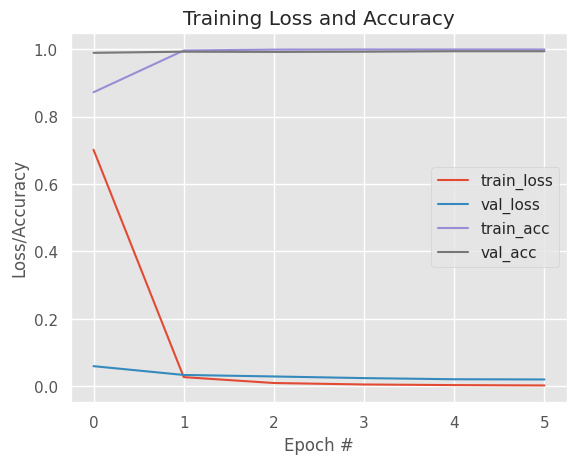

In [ ]:
print("[INFO]: Entrenando la red neuronal...")
H = vgg16_model_fin.fit(train_data_vgg16,
                      epochs=epochs,
                      batch_size=BATCH_SIZE,
                      validation_data=(valid_data_vgg16))

# A partir de la época 6 ya no sube el val_accuracy

visualize_learning_curve(H)

Guardamos el modelo

In [ ]:
vgg16_model_fin.save(BASE_DIR + 'models/' + 'pre_trained_model_VGG16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluamos el modelo, mirando las principales métricas

In [ ]:
# Evaluamos el modelo con el conjunto de test
vgg16_score = vgg16_model_fin.evaluate(test_data_vgg16)

# Sacamos las principales métricas
evaluate_model(vgg16_model_fin, test_data_vgg16)

24/24 [==============================] - 13s 543ms/step - loss: 0.0178 - accuracy: 0.9953
[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.99      0.99      0.99       200
Bitter_Gourd       0.99      0.99      0.99       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       0.99      0.98      0.99       200
    Broccoli       0.99      0.98      0.99       200
     Cabbage       0.99      1.00      0.99       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       1.00      0.99      1.00       200
    Cucumber       0.99      0.99      0.99       200
      Papaya       0.99      0.99      0.99       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       1.00      1.00      1.00       200
      Radish       1.00      1.00      1.00       200
      Tomato       0.99

Dibujamos la matriz de confusión

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


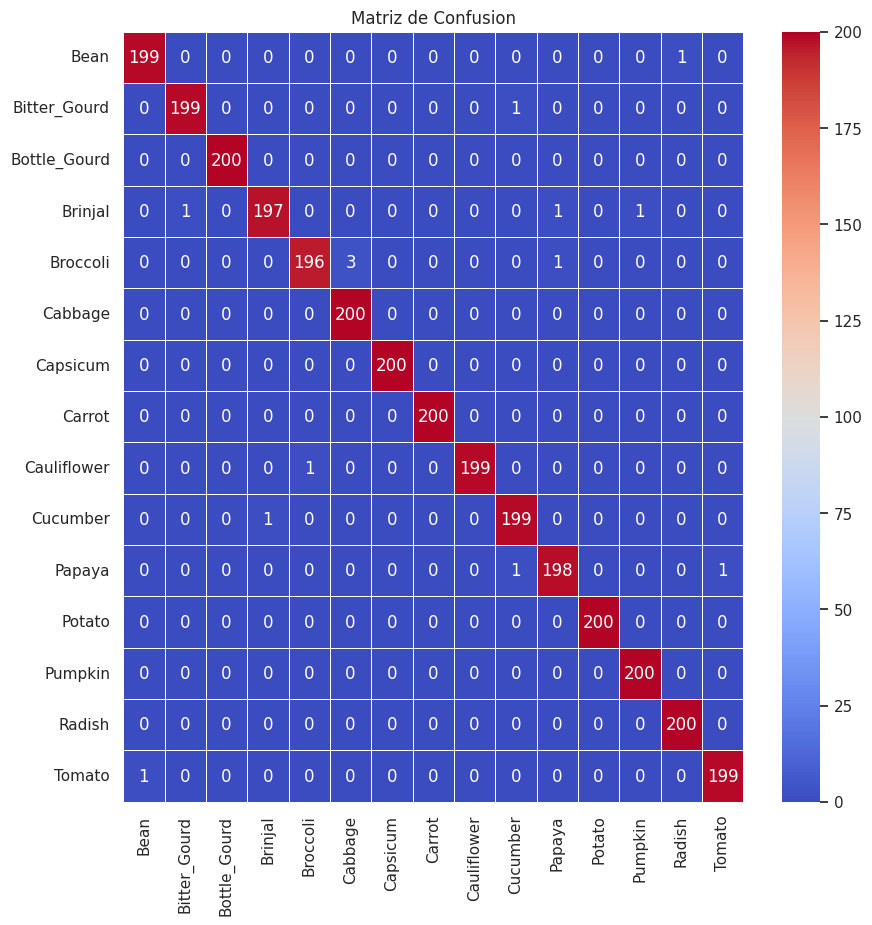

In [ ]:
plot_confusion_matrix(vgg16_model_fin, test_data_vgg16)

### **Fine Tuning**



Para el Fine Tuning vamos a congelar algunas capas del modelo original. Para ello, vamos a definir una función que se encargue de congelar las capas.

In [ ]:
from tensorflow.keras import layers

def congelar_capas(fine_tune, modelo):
    if fine_tune > 0:
        for layer in modelo.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in modelo.layers:
            layer.trainable = True

Congelamos las capas del modelo

In [ ]:
fine_tune = 2

congelar_capas(fine_tune, model_vgg16)

Creamos el nuevo modelo

In [ ]:
from keras.models import Model

top_model = Flatten()(model_vgg16.output)
top_model = Dense(256, activation='relu')(top_model)
output_layer = Dense(15, activation='softmax')(top_model)

vgg16_model_fin = Model(inputs=model_vgg16.input, outputs=output_layer)

Definimos los hiperparámetros del nuevo modelo y compilamos

In [ ]:
# Definicion de hiperparametros
batch_size = 32
learning_rate = 0.0001
epochs = 10
num_clases = 15

# Compilamos el modelo y entrenamos
vgg16_model_fin.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"]
                      )

Entrenamos el modelo y observamos la gráfica de pérdida y precisión

[INFO]: Entrenando la red neuronal...
Epoch 1/10
118/118 [==============================] - 106s 790ms/step - loss: 0.4264 - accuracy: 0.8991 - val_loss: 0.0818 - val_accuracy: 0.9880
Epoch 2/10
118/118 [==============================] - 81s 680ms/step - loss: 0.0445 - accuracy: 0.9953 - val_loss: 0.0457 - val_accuracy: 0.9927
Epoch 3/10
118/118 [==============================] - 87s 738ms/step - loss: 0.0195 - accuracy: 0.9992 - val_loss: 0.0324 - val_accuracy: 0.9947
Epoch 4/10
118/118 [==============================] - 80s 677ms/step - loss: 0.0107 - accuracy: 0.9997 - val_loss: 0.0279 - val_accuracy: 0.9940
Epoch 5/10
118/118 [==============================] - 80s 675ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0255 - val_accuracy: 0.9953
Epoch 6/10
118/118 [==============================] - 80s 676ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9950
Epoch 7/10
118/118 [==============================] - 80s 681ms/step - loss: 0.0037 - accur

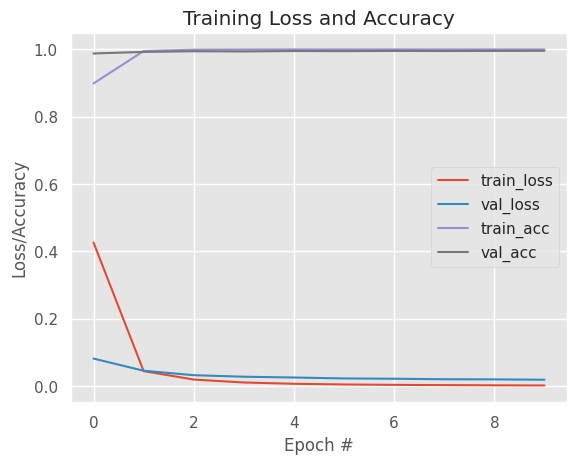

In [ ]:
print("[INFO]: Entrenando la red neuronal...")
H = vgg16_model_fin.fit(train_data_vgg16,
                      epochs=epochs,
                      batch_size=BATCH_SIZE,
                      validation_data=(valid_data_vgg16))

visualize_learning_curve(H)

Guardamos el modelo

In [ ]:
vgg16_model_fin.save(BASE_DIR + 'models/' + 'pre_trained_model_VGG16_ft.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluamos el modelo, mirando las principales métricas

In [ ]:
# Evaluamos el modelo con el conjunto de test
vgg16_ft_score = vgg16_model_fin.evaluate(test_data_vgg16)

# Sacamos las principales métricas
evaluate_model(vgg16_model_fin, test_data_vgg16)

24/24 [==============================] - 14s 553ms/step - loss: 0.0166 - accuracy: 0.9957
[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.99      0.99      0.99       200
Bitter_Gourd       0.99      0.99      0.99       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       0.99      0.99      0.99       200
    Broccoli       1.00      0.98      0.99       200
     Cabbage       0.99      1.00      0.99       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       1.00      1.00      1.00       200
    Cucumber       0.99      0.99      0.99       200
      Papaya       1.00      0.99      0.99       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       0.99      0.99      0.99       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00

Dibujamos la matriz de confusión

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


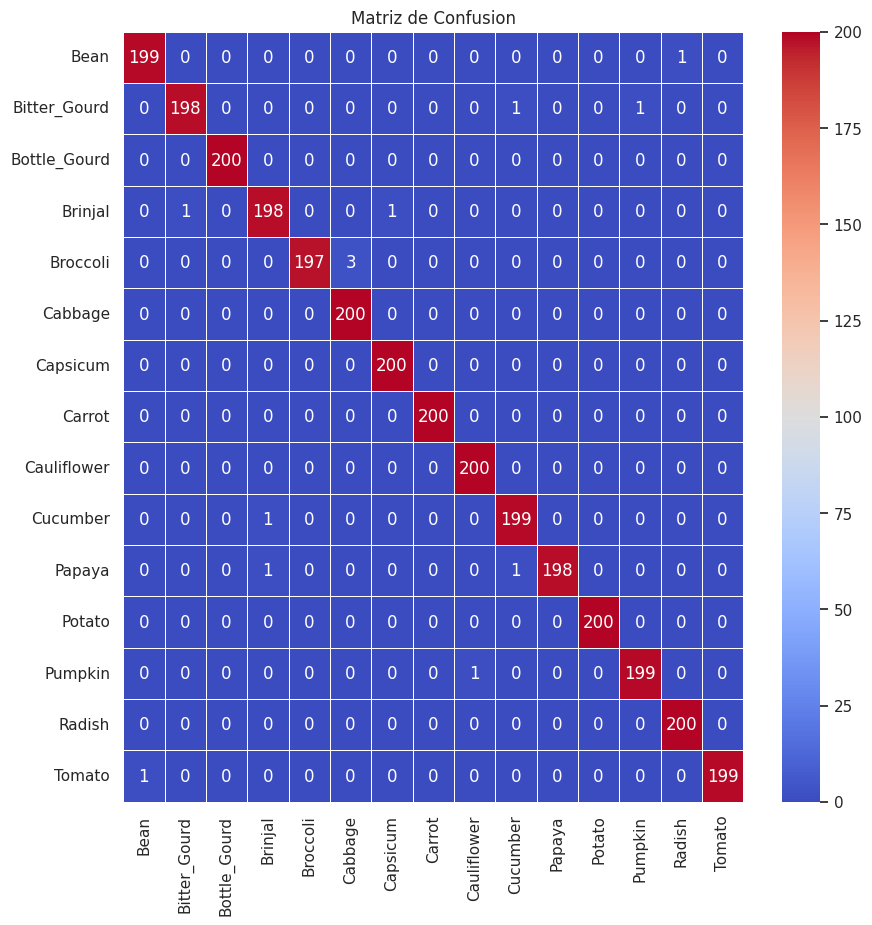

In [ ]:
plot_confusion_matrix(vgg16_model_fin, test_data_vgg16)

# VGG19

### **Transfer learning**

Cargamos el modelo pre-entrenado y congelamos las capas del modelo

In [ ]:
from tensorflow.keras.applications import VGG19

model_vgg19 = VGG19(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classifier_activation='softmax'
)

model_vgg19.trainable = False

Creamos un nuevo conjunto de datos utilizando el preprocesado necesario para utilizar el modelo VGG19

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_vgg19 = ImageDataGenerator(rescale=1 / 255.,
                             preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

train_data_vgg19 = datagen_vgg19.flow_from_directory(DATA_DIR + 'train/',
                                         target_size=(224, 224),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

valid_data_vgg19 = datagen_vgg19.flow_from_directory(DATA_DIR + 'validation/',
                                         target_size=(224, 224),
                                         color_mode='rgb',
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=False)

test_data_vgg19 = datagen_vgg19.flow_from_directory(DATA_DIR + 'test/',
                                        target_size=(224, 224),
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)



Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


Creamos el nuevo modelo

In [ ]:
from keras.models import Model

top_model = Flatten()(model_vgg19.output)
top_model = Dense(256, activation='relu')(top_model)
top_model = Dense(128, activation='relu')(top_model)
output_layer = Dense(15, activation='softmax')(top_model)

vgg19_model_fin = Model(inputs=model_vgg19.input, outputs=output_layer)

vgg19_model_fin.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Definimos los hiperparámetros del nuevo modelo y compilamos

In [ ]:
# Definicion de hiperparametros
batch_size = 32
learning_rate = 0.001
epochs = 6
num_clases = 15

# Compilamos el modelo y entrenamos
vgg19_model_fin.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"]
                      )

Entrenamos el modelo y observamos la gráfica de pérdida y precisión


[INFO]: Entrenando la red neuronal...
Epoch 1/6
118/118 [==============================] - 98s 814ms/step - loss: 0.4944 - accuracy: 0.8764 - val_loss: 0.0782 - val_accuracy: 0.9827
Epoch 2/6
118/118 [==============================] - 96s 811ms/step - loss: 0.0267 - accuracy: 0.9961 - val_loss: 0.0488 - val_accuracy: 0.9880
Epoch 3/6
118/118 [==============================] - 95s 807ms/step - loss: 0.0078 - accuracy: 0.9997 - val_loss: 0.0394 - val_accuracy: 0.9903
Epoch 4/6
118/118 [==============================] - 100s 844ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0278 - val_accuracy: 0.9910
Epoch 5/6
118/118 [==============================] - 95s 808ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 0.9917
Epoch 6/6
118/118 [==============================] - 95s 807ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 0.9920


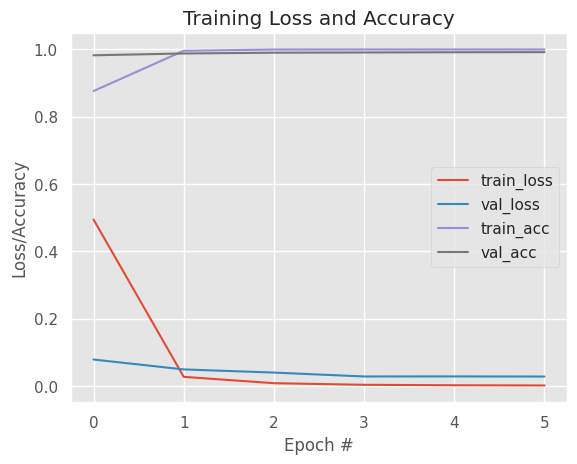

In [ ]:
print("[INFO]: Entrenando la red neuronal...")
H = vgg19_model_fin.fit(train_data_vgg19,
                      epochs=epochs,
                      batch_size=BATCH_SIZE,
                      validation_data=(valid_data_vgg19))

visualize_learning_curve(H)

Guardamos el modelo

In [ ]:
vgg19_model_fin.save(BASE_DIR + 'models/' + 'pre_trained_model_VGG19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluamos el modelo, mirando las principales métricas


In [ ]:
# Evaluamos el modelo con el conjunto de test
vgg19_score = vgg19_model_fin.evaluate(test_data_vgg19)

# Sacamos las principales métricas
evaluate_model(vgg19_model_fin, test_data_vgg19)

24/24 [==============================] - 16s 641ms/step - loss: 0.0187 - accuracy: 0.9953
[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.99      0.99      0.99       200
Bitter_Gourd       0.99      0.99      0.99       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       0.98      0.98      0.98       200
    Broccoli       1.00      0.99      0.99       200
     Cabbage       0.99      0.99      0.99       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       1.00      1.00      1.00       200
    Cucumber       0.99      1.00      0.99       200
      Papaya       0.99      0.98      0.99       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       1.00      0.99      1.00       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00

Dibujamos la matriz de confusión

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


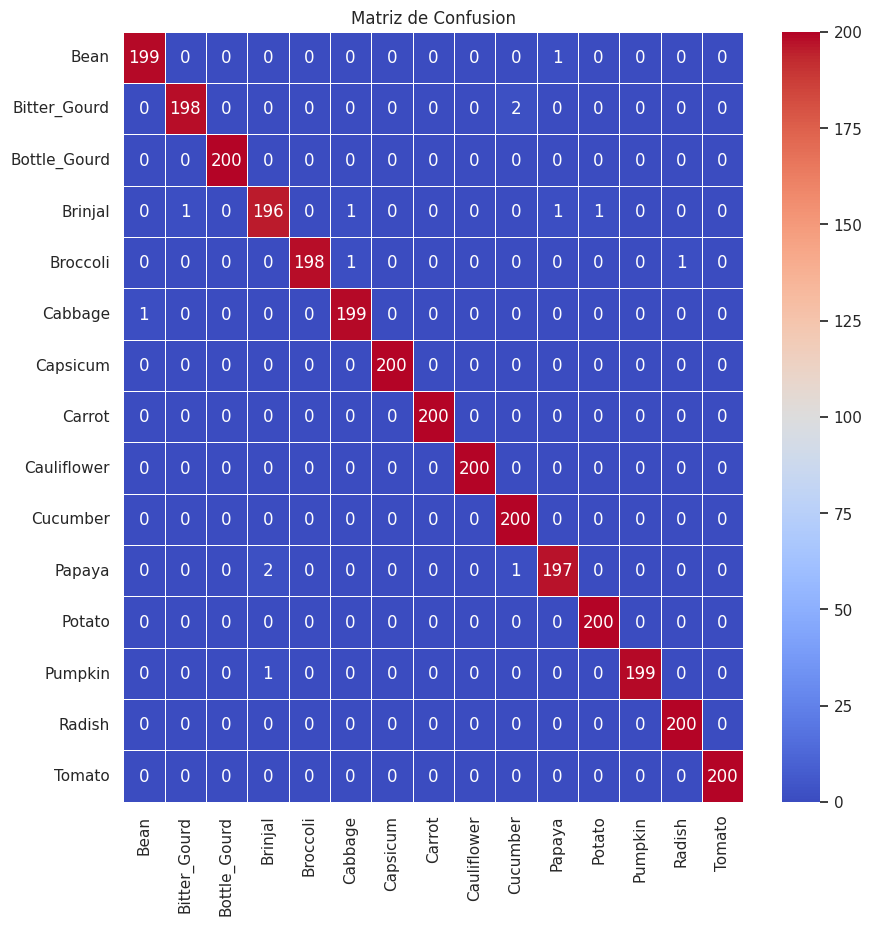

In [ ]:
plot_confusion_matrix(vgg19_model_fin, test_data_vgg19)

### **Fine tuning**

Para el Fine Tuning vamos a congelar algunas capas del modelo original. Para ello, vamos a definir una función que se encargue de congelar las capas.

In [ ]:
from tensorflow.keras import layers

def congelar_capas(fine_tune, modelo):
    if fine_tune > 0:
        for layer in modelo.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in modelo.layers:
            layer.trainable = True

Congelamos las capas del modelo

In [ ]:
fine_tune = 2

congelar_capas(fine_tune, model_vgg19)

Creamos el nuevo modelo

In [ ]:
from keras.models import Model

top_model = Flatten()(model_vgg19.output)
top_model = Dense(256, activation='relu')(top_model)
top_model = Dense(128, activation='relu')(top_model)
output_layer = Dense(15, activation='softmax')(top_model)

vgg19_model_fin = Model(inputs=model_vgg19.input, outputs=output_layer)

Definimos los hiperparámetros del nuevo modelo y compilamos


In [ ]:
# Definicion de hiperparametros
batch_size = 32
learning_rate = 0.0001
epochs = 10
num_clases = 15

# Compilamos el modelo y entrenamos
vgg19_model_fin.compile(optimizer=Adam(learning_rate=learning_rate),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"]
                      )

Entrenamos el modelo y observamos la gráfica de pérdida y precisión

[INFO]: Entrenando la red neuronal...
Epoch 1/10
118/118 [==============================] - 106s 892ms/step - loss: 0.6673 - accuracy: 0.8479 - val_loss: 0.1490 - val_accuracy: 0.9773
Epoch 2/10
118/118 [==============================] - 96s 811ms/step - loss: 0.0775 - accuracy: 0.9901 - val_loss: 0.0659 - val_accuracy: 0.9883
Epoch 3/10
118/118 [==============================] - 104s 881ms/step - loss: 0.0325 - accuracy: 0.9977 - val_loss: 0.0465 - val_accuracy: 0.9913
Epoch 4/10
118/118 [==============================] - 97s 817ms/step - loss: 0.0180 - accuracy: 0.9993 - val_loss: 0.0395 - val_accuracy: 0.9917
Epoch 5/10
118/118 [==============================] - 100s 847ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.0313 - val_accuracy: 0.9930
Epoch 6/10
118/118 [==============================] - 96s 810ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.9920
Epoch 7/10
118/118 [==============================] - 96s 810ms/step - loss: 0.0052 - acc

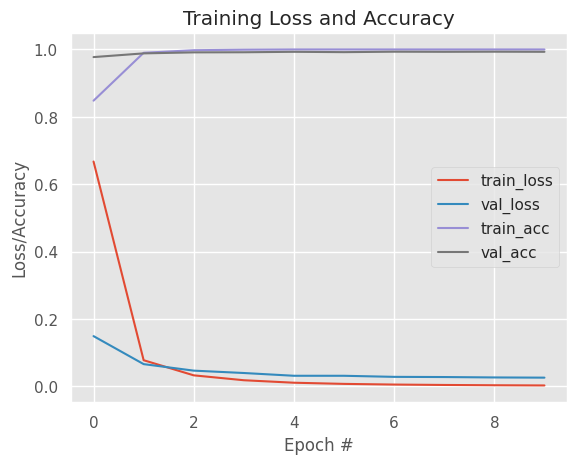

In [ ]:
print("[INFO]: Entrenando la red neuronal...")
H = vgg19_model_fin.fit(train_data_vgg19,
                      epochs=epochs,
                      batch_size=BATCH_SIZE,
                      validation_data=(valid_data_vgg19))

visualize_learning_curve(H)

Guardamos el modelo

In [ ]:
vgg19_model_fin.save(BASE_DIR + 'models/' + 'pre_trained_model_VGG19_ft.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluamos el modelo, mirando las principales métricas


In [ ]:
# Evaluamos el modelo con el conjunto de test
vgg19_ft_score = vgg19_model_fin.evaluate(test_data_vgg19)

# Sacamos las principales métricas
evaluate_model(vgg19_model_fin, test_data_vgg19)

24/24 [==============================] - 16s 657ms/step - loss: 0.0175 - accuracy: 0.9963
[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo informe de métricas...
              precision    recall  f1-score   support

        Bean       0.99      0.99      0.99       200
Bitter_Gourd       1.00      0.99      1.00       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       0.99      0.98      0.99       200
    Broccoli       1.00      0.99      1.00       200
     Cabbage       0.99      0.99      0.99       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       1.00      1.00      1.00       200
    Cucumber       0.99      1.00      1.00       200
      Papaya       0.99      0.98      0.99       200
      Potato       0.99      0.99      0.99       200
     Pumpkin       1.00      1.00      1.00       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00

Dibujamos la matriz de confusión

[INFO]: Evaluando red neuronal...
[INFO]: Obteniendo matriz de confusión...


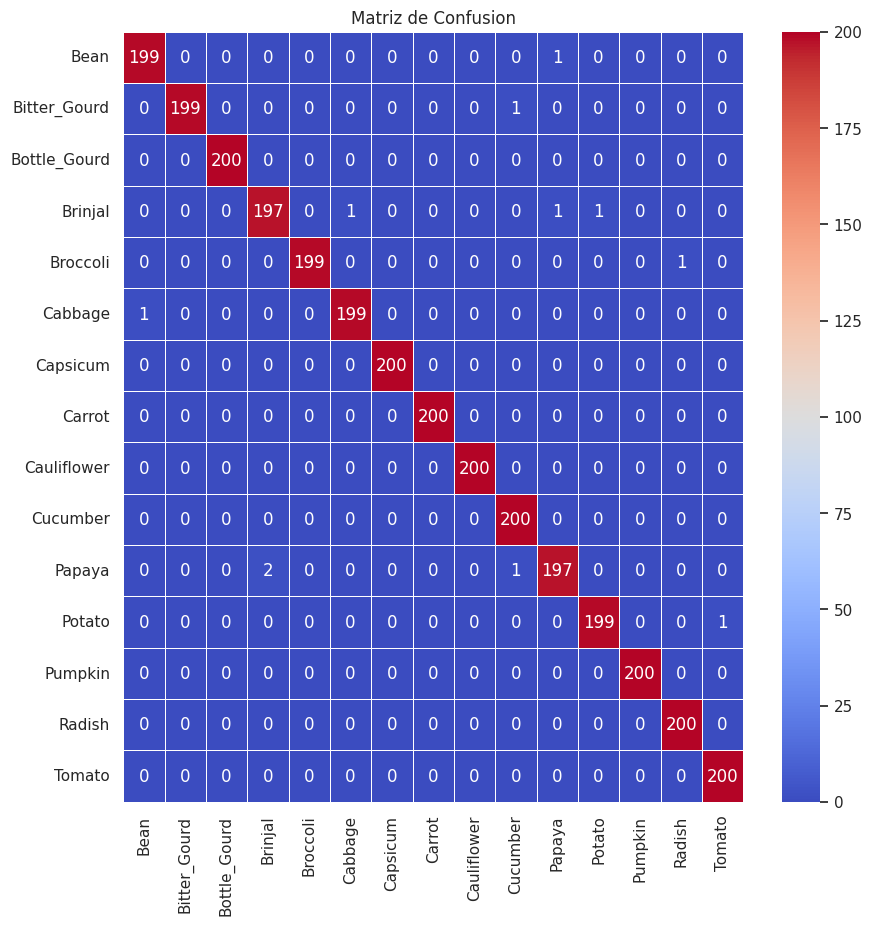

In [ ]:
plot_confusion_matrix(vgg19_model_fin, test_data_vgg19)

A continuación vamos a hacer la comparativa de todos los modelos pre-entrenados utilizados.

In [ ]:
import pandas as pd

results = [
    {'Modelo': 'ResNet50', 'Loss': resnet50_score[0], 'Accuracy': '{:.4f}%'.format(resnet50_score[1]*100)},
    {'Modelo': 'ResNet50_FT', 'Loss': resnet50_ft_score[0], 'Accuracy': r'{:.4f}%'.format(resnet50_ft_score[1]*100)},
    {'Modelo': 'VGG16', 'Loss': vgg16_score[0], 'Accuracy': '{:.4f}%'.format(vgg16_score[1]*100)},
    {'Modelo': 'VGG16_FT', 'Loss': vgg16_ft_score[0], 'Accuracy': '{:.4f}%'.format(vgg16_ft_score[1]*100)},
    {'Modelo': 'VGG19', 'Loss': vgg19_score[0], 'Accuracy': '{:.4f}%'.format(vgg19_score[1]*100)},
    {'Modelo': 'VGG19_FT', 'Loss': vgg19_ft_score[0], 'Accuracy': '{:.4f}%'.format(vgg19_ft_score[1]*100)},
]

df_resultados = pd.DataFrame(results)
display(df_resultados)

df_resultados['Accuracy'] = pd.to_numeric(df_resultados['Accuracy'].str.rstrip('%'))
indice_max = df_resultados['Accuracy'].idxmax()

print("El modelo que mejor precisión tiene es "+df_resultados.iloc[indice_max, 0]+" con una precisión del {:.2f}%".format(df_resultados.iloc[indice_max, 2]))

Modelo      Loss  Accuracy
0     ResNet50  0.896100  71.2667%
1  ResNet50_FT  0.675657  78.1667%
2        VGG16  0.017810  99.5333%
3     VGG16_FT  0.016649  99.5667%
4        VGG19  0.018658  99.5333%
5     VGG19_FT  0.017521  99.6333%

El modelo que mejor precisión tiene es VGG19_FT con una precisión del 99.63%


Como podemos observar en la tabla anterior con los resultados, el mejor modelo es el que utiliza la red pre-entrenada VGG19 con Fine Tuning.

Sin embargo, vemos que todos los modelos funcionan muy bien, ya que el accuracy es muy alto para todos los casos de VGG (más del 99.50%), y la diferencia entre un modelo y otro será de muy pocos casos clasificados incorrectamente.

# Conclusiones finales

Con un sencillo modelo (con 1.011.599 parámetros y 3,86 MB) hemos logrado alcanzar una precisión del 99,3%, lo que sería fácil de implementar en peuqeños dispositivos como por ejemplo IoT. La desventaja es el tiempo que hay que invertir en encontrar este modelo debido a la gran cantidad de combinaciones de los distintos hiperparámetros que se pueden realizar, incluso haciendo uso de herramientas como **Keras Tuner** que automatizan el proceso.

Con otros modelos preentrenados, el ajustar el modelo a nuestro problema es mucho más fácil y rápido, a costa de un mayor tamaño:

|Modelo|Parámetros totales|Tamaño (MB)|
|:-:|:-:|:-:|
|ResNet-50|49.312.911|188,11|
|VGG-16|21.141.327|80,65|
|VGG-19|26.481.999|101,02|

Esto también ralentiza la evaluación de dichos modelos respecto del obtenido desde cero.

# Convertir *Notebook* a formato *PDF*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture --no-display
!sudo apt install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
BASE_DIR = "/content/drive/MyDrive/07MIAR_Proyecto_Programacion/"

In [ ]:
%%capture --no-display

name_IPYNB_file = '07MIAR_Proyecto_Programacion_SOLUCION.ipynb'
path_to_file = BASE_DIR + name_IPYNB_file

!jupyter nbconvert --to pdf $path_to_file